In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
df_list=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='77ddb659bc654aeda8ee00cea8b65b68', client_secret='3a1676a380f64f4790690aebe13a526f'))

playlists = ['37i9dQZF1DX9kVlnA5Si6s', '37i9dQZF1DX5rOEFf3Iycd', '37i9dQZF1DXa2huSXaKVkW', '37i9dQZF1DWZNJXX2UeBij', '37i9dQZF1DWVDvBpGQbzXj']


for index,playlist_id in enumerate(playlists):
    hindi_songs = []
    results = sp.playlist_tracks(playlist_id)


    for item in results['items']:

        track = item['track']
        song_info = {
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date']
        }
        hindi_songs.append(song_info)

        for song in hindi_songs:
          print(f"Song: {song['name']}, Artist: {song['artist']}, 'Album' : {song['album_name']}, 'Date':{track['album']['release_date']}")
        df_list[index]=pd.DataFrame(hindi_songs)


Streaming output truncated to the last 5000 lines.
Song: Aayo Kahan Se Ghanshyam, Artist: Manna Dey, 'Album' : Buddha Mil Gaya, 'Date':1977-08-25
Song: Ae Bhai Zara Dekh Ke Chalo, Artist: Manna Dey, 'Album' : Mera Naam Joker (Original Motion Picture Soundtrack), 'Date':1977-08-25
Song: Bole Re Papihara, Artist: Vani Jairam, 'Album' : Guddi (Original Motion Picture Soundtrack), 'Date':1977-08-25
Song: Yari Hai Imaan Mera, Artist: Manna Dey, 'Album' : Zanjeer (Original Motion Picture Soundtrack), 'Date':1977-08-25
Song: Zindagi Ka Safar, Artist: Kishore Kumar, 'Album' : Safar, 'Date':1977-08-25
Song: Zindagi Ek Safar Hai Suhana - Kishore Kumar, Artist: Kishore Kumar, 'Album' : Andaz, 'Date':1977-08-25
Song: Khilte Hain Gul Yahan, Artist: Kishore Kumar, 'Album' : Sharmilee, 'Date':1977-08-25
Song: Tere Chehre Mein Woh Jadoo Hai, Artist: Kishore Kumar, 'Album' : Dharmatma, 'Date':1977-08-25
Song: Humko Tumse Ho Gaya Hai Pyar - From "Amar Akbar Anthony", Artist: Kishore Kumar, 'Album' : Ama

In [ ]:
for i in range(len(df_list)):
  df_list[i]['name'] = df_list[i]['name'].str.replace(r'\[.*?\]|\(.*?\)|\s*-\s*.*$', '', regex=True)

In [ ]:
for i in range(len(df_list)):
  print(df_list[i].isna().sum())

name            0
artist          0
album_name      0
release_date    0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
dtype: int64


In [ ]:
!pip install lyrics-extractor

In [ ]:
from lyrics_extractor import SongLyrics

In [ ]:
import bs4
import requests
import re

In [ ]:
def get_lyrics(song, artist=None):
    query = song.replace(" ", "-")
    base_url = f"https://www.lyricsbogie.com/{query}/"

    response = requests.get(base_url)
    if response.status_code != 200:
        return "Error fetching the search results."

    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    content_div = soup.find("div", class_="wp-block-ub-tabbed-content-block wp-block-ub-tabbed-content wp-block-ub-tabbed-content-holder wp-block-ub-tabbed-content-horizontal-holder-mobile wp-block-ub-tabbed-content-horizontal-holder-tablet")

    if content_div:
        content = content_div.get_text(separator="\n").strip()
        print(f"Lyrics for song {song} found")
        return content
    else:
        print("Div with specified class not found.")
        return None

In [ ]:
for i in range(len(df_list)):
  df_list[i]['lyrics']=df_list[i]['name'].apply(lambda x: get_lyrics(x))

Lyrics for song Pal Pal Dil Ke Paas found
Lyrics for song Salame Ishq Meri Jaan found
Lyrics for song Mehbooba Mehbooba found
Lyrics for song Zindagi Kaisi Hai Paheli found
Lyrics for song Meri Bheegi Bheegi Si found
Lyrics for song Seene Mein Jalan found
Lyrics for song O Meri Mehbooba Mehbooba Mehbooba found
Lyrics for song Gori Tera Gaon Bada Pyara found
Lyrics for song Chalte Chalte Yun Hi Koi found
Lyrics for song My Heart Is Beating found
Lyrics for song Koyal Boli Duniya Doli found
Lyrics for song Phoolon Ke Rang Se found
Lyrics for song Jeena Yahan Marna Yahan found
Lyrics for song Na Mangun Sona Chandi found
Lyrics for song Itna To Yaad Hai Mujhe found
Lyrics for song Teri Rab Ne Bana Di Jodi found
Lyrics for song Yeh Raaten found
Lyrics for song Golmaal Hai Bhai Sab Golmaal found
Lyrics for song Haye Re Haye found
Lyrics for song Duniya Mein Logon Ko found
Lyrics for song Jis Gali Mein Tera Ghar found
Lyrics for song Ae Bhai Zara Dekh Ke Chalo found
Lyrics for song Bole Re Pa

In [ ]:
!pip install indic-transliteration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install google-transliteration-api

In [ ]:
from google.transliteration import transliterate_text

In [ ]:
def clean_lyrics(song):
    song = song.replace('\n', ' ')
    song = ' '.join(song.split())
    song = re.sub(r'^(English|हिंदी\s+)', '', song)
    song = re.sub(r'[^a-zA-Z0-9\s]', '', song)
    song = re.sub(r'lyricsbogiecom', '', song)

    song = song.strip()

    return song

In [ ]:
df_list[0].head()

name           artist  \
0             Pal Pal Dil Ke Paas    Kishore Kumar   
1   Chand Mera Dil Chandni Ho Tum    Mohammed Rafi   
2           Salame Ishq Meri Jaan  Lata Mangeshkar   
3   Main Pal Do Pal Ka Shair Hoon           Mukesh   
4  Jaaneman Jaaneman Tere Do Nain    K. J. Yesudas   

                                          album_name release_date  \
0     Blackmail (Original Motion Picture Soundtrack)   1973-01-01   
1                              Hum Kisise Kum Naheen   1977-08-25   
2  Muqaddar Ka Sikandar (Original Motion Picture ...   1978-12-01   
3  Kabhi Kabhie (Original Motion Picture Soundtrack)   1976-12-30   
4                                     Chhoti Si Baat   1975-12-31   

                                              lyrics  
0  English\n\n\n\n\nPal pal dil ke paas tum rahat...  
1                 Error fetching the search results.  
2  English\n\n\n\n\nIshq vaalo se na puchho ki\n\...  
3                 Error fetching the search results.  
4                 Error fetching the search results.

In [ ]:
for i in range(len(df_list)):
  df_list[i]['lyrics']=df_list[i]['lyrics'].apply(lambda x: clean_lyrics(x))

In [ ]:
df_list[0]

name           artist  \
0              Pal Pal Dil Ke Paas    Kishore Kumar   
1    Chand Mera Dil Chandni Ho Tum    Mohammed Rafi   
2            Salame Ishq Meri Jaan  Lata Mangeshkar   
3    Main Pal Do Pal Ka Shair Hoon           Mukesh   
4   Jaaneman Jaaneman Tere Do Nain    K. J. Yesudas   
..                             ...              ...   
95            Ye Jawani Hai Diwani    Kishore Kumar   
96        Main Na Bhoolunga, Pt. 1  Lata Mangeshkar   
97        Chala Bhi Aa Aaja Rasiya    Mohammed Rafi   
98                 Maine Tere Liye           Mukesh   
99                 O Ghata Sanwari  Lata Mangeshkar   

                                           album_name release_date  \
0      Blackmail (Original Motion Picture Soundtrack)   1973-01-01   
1                               Hum Kisise Kum Naheen   1977-08-25   
2   Muqaddar Ka Sikandar (Original Motion Picture ...   1978-12-01   
3   Kabhi Kabhie (Original Motion Picture Soundtrack)   1976-12-30   
4                                      Chhoti Si Baat   1975-12-31   
..                                                ...          ...   
95  Jawani Diwani (Original Motion Picture Soundtr...   1972-01-01   
96  Roti Kapada Aur Makaan (Original Motion Pictur...   1974-10-18   
97                                     Man Ki Aankhen   1970-01-01   
98         Anand (Original Motion Picture Soundtrack)   1970-12-31   
99                                          Abhinetri   1970-05-12   

                                               lyrics  
0   Pal pal dil ke paas tum rahati ho Pal pal dil ...  
1                   Error fetching the search results  
2   Ishq vaalo se na puchho ki Unaki raat kaa aala...  
3                   Error fetching the search results  
4                   Error fetching the search results  
..                                                ...  
95                  Error fetching the search results  
96                  Error fetching the search results  
97  Chala bhi aa aaja rasiya O jaane vaale aa jaa ...  
98  English                                       ...  
99  O ghata sawari thodi thodi Bawari ho gayi hai ...  

[100 rows x 5 columns]

In [ ]:
for i in range(len(df_list)):
  index_invalid=df_list[i][df_list[i]['lyrics'].str.contains('Error', na=False)].index
  df_list[i].drop(index_invalid,inplace=True)

In [ ]:
df_list[0].head()

name           artist  \
0       Pal Pal Dil Ke Paas    Kishore Kumar   
2     Salame Ishq Meri Jaan  Lata Mangeshkar   
5         Mehbooba Mehbooba     R. D. Burman   
7  Zindagi Kaisi Hai Paheli        Manna Dey   
9     Meri Bheegi Bheegi Si    Kishore Kumar   

                                          album_name release_date  \
0     Blackmail (Original Motion Picture Soundtrack)   1973-01-01   
2  Muqaddar Ka Sikandar (Original Motion Picture ...   1978-12-01   
5        Sholay (Original Motion Picture Soundtrack)   1975-01-01   
7         Anand (Original Motion Picture Soundtrack)   1970-12-31   
9                                            Anamika   1972-01-01   

                                              lyrics  
0  Pal pal dil ke paas tum rahati ho Pal pal dil ...  
2  Ishq vaalo se na puchho ki Unaki raat kaa aala...  
5  Mehbooba ooh mehbooba ooh Mehbooba ooh Ooh meh...  
7  English                                       ...  
9  Meri bheegi bheegi si palkon pe rah gaye Jaise...

In [ ]:
for i in range(len(df_list)):
  df_list[i]['lyrics']=df_list[i]['lyrics'].apply(lambda x : transliterate_text(x,lang_code='hi'))

In [ ]:
df_list[0]['lyrics']

0     पल पल दिल के पास तुम रहती हो पल पल दिल के पास ...
2     इश्क़ वालो से न पूछो की उनकी रात का आलम तनहा कै...
5     मेहबूबा उह मेहबूबा उह मेहबूबा उह उह मेहबूबा ऐ ...
7     इंग्लिश जिंदगी कैसी है पहेली हाय कभी तोह हसए क...
9     मेरी भीगी भीगी सी पलकों पे रह गए जैसे मेरे सपन...
10    सीने में जलन आँखों में तूफ़ान सा क्यों है सीने ...
16    इंग्लिश ो मेरी मेहबूबा मेहबूबा मेहबूबा तुझे जा...
17    गोरी तेरा गाँव बड़ा प्यारा मैं तोह गया मारा आके...
21    चलते चलते चलते चलते यूँ ही कोई मिल गया था यूँ ...
22    माय हार्ट इस बीटिंग बीटिंग बीटिंग बीटिंग बीटिं...
24    कोयल बोली दुनिया डोली कोयल बोली दुनिया डोली सम...
25    फूलों के रंग से दिल की कलम से तुझ को लिखी रोज ...
26    जीना यहाँ मरना यहाँ इसके शिव जाना कहाँ जीना यह...
28    न चाहूँ सोना चांदी न चाहूँ हीरा मोती यह मेरे क...
29    इंग्लिश इतना तो याद है मुझे ो इतना तो याद है म...
30    इंग्लिश तेरी रब ने बना दी जोड़ी तेरी रब ने तेरी...
31    ये रातें ये मौसम नदी का किनारा ये चंचल हवा ये ...
33    गोलमाल है भाई सब गोलमाल है गोलमाल है भाई सब गो...
34    इंग्लिश ु ूँ ूओं उउउउन ूँ उन उन ूँ हाय रे हाय ...
36    बीरा तारा तारा तारा पारा पारा पारा बीरा तारा त...
37    इंग्लिश जिस गली में तेरा घर न हो बलमा उस गली स...
39    इंग्लिश ए भाई ज़रा देखके चलो आगे ही नहीं पीछे भ...
40    बोले रे पपीहरा पपीहरा बोले रे पपीहरा पपीहरा नि...
42    ज़िन्दगी का सफर है ये कैसा सफर कोई समझा नहीं को...
43    ज़िन्दगी एक सफर है सुहाना यहाँ कल क्या हो किसने...
49    इंग्लिश होगी न इसकी खता नादान है दिल यह मेरा ह...
52    हम थे जिनके सहारे वो हुए ना हमारे डूबी जब दिल ...
63    किस लिए मैं ने प्यार किया दिल को यूँही बेक़रार ...
65    वे वांट ा वंडरफुल वाओ वेट वेट यू सी थे व्होले ...
66    कोई हसीना जब रूठ जाती है तो और भी हसीं हो जाती...
67    इंग्लिश यह क्या हुआ कैसे हुआ कब हुआ यह क्या हु...
68    दिल तो हैं दिल दिल का ऐतबार क्या कीजे दिल तो ह...
69    पीया तू अब तो आ जा हे हे हे हे मोनिका वो आ गया...
72    इंग्लिश ो ो मेरे राजा ो ो मेरे राजा खफा न होना...
75    झूट बोले कौवा काटे काले कौवे से दर्रियो मैं मइ...
79    तुम आ गए हो नूर आ गया है तुम आ गए हो नूर आ गया...
82    ले जायेंगे ले जायेंगे दिलवाले दुल्हनिया ले जाय...
84    चंदा ो चंदा चंदा ो चंदा किसने चुराई तेरी मेरी ...
88    ू हो जा रे जा जा रे जा ू हरजाई देखि तेरी दिलदा...
89    इंग्लिश दो दिल टूटें दो दिल हारे दुनिया वालो स...
91    हुर्रा हो मारा सुन चंपा सुन तारा कोई जीता कोई ...
93    इंग्लिश आ अब तो है तुमसे हर ख़ुशी अपनी अब तो है...
97    चला भी आ आजा रसिया ो जाने वाले आ जा तेरी याद स...
98    इंग्लिश मैंने तेरे लिए ही सात रंग के सपने चुने...
99    ो घटा सवारी थोड़ी थोड़ी बावरी हो गयी है बरसात क्...
Name: lyrics, dtype: object

In [ ]:
for i in range(len(df_list)):
    print(df_list[i].isna().sum())

name            0
artist          0
album_name      0
release_date    0
lyrics          0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
lyrics          0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
lyrics          0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
lyrics          0
dtype: int64
name            0
artist          0
album_name      0
release_date    0
lyrics          0
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.patches import Rectangle
sns.set(context='poster', style='white')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
min_count = 2
n_words_display = 200

In [ ]:
import math

In [ ]:
decades={
    0:'70s',
    1:'80s',
    2:'90s',
    3:'00s',
    4:'10s',
}

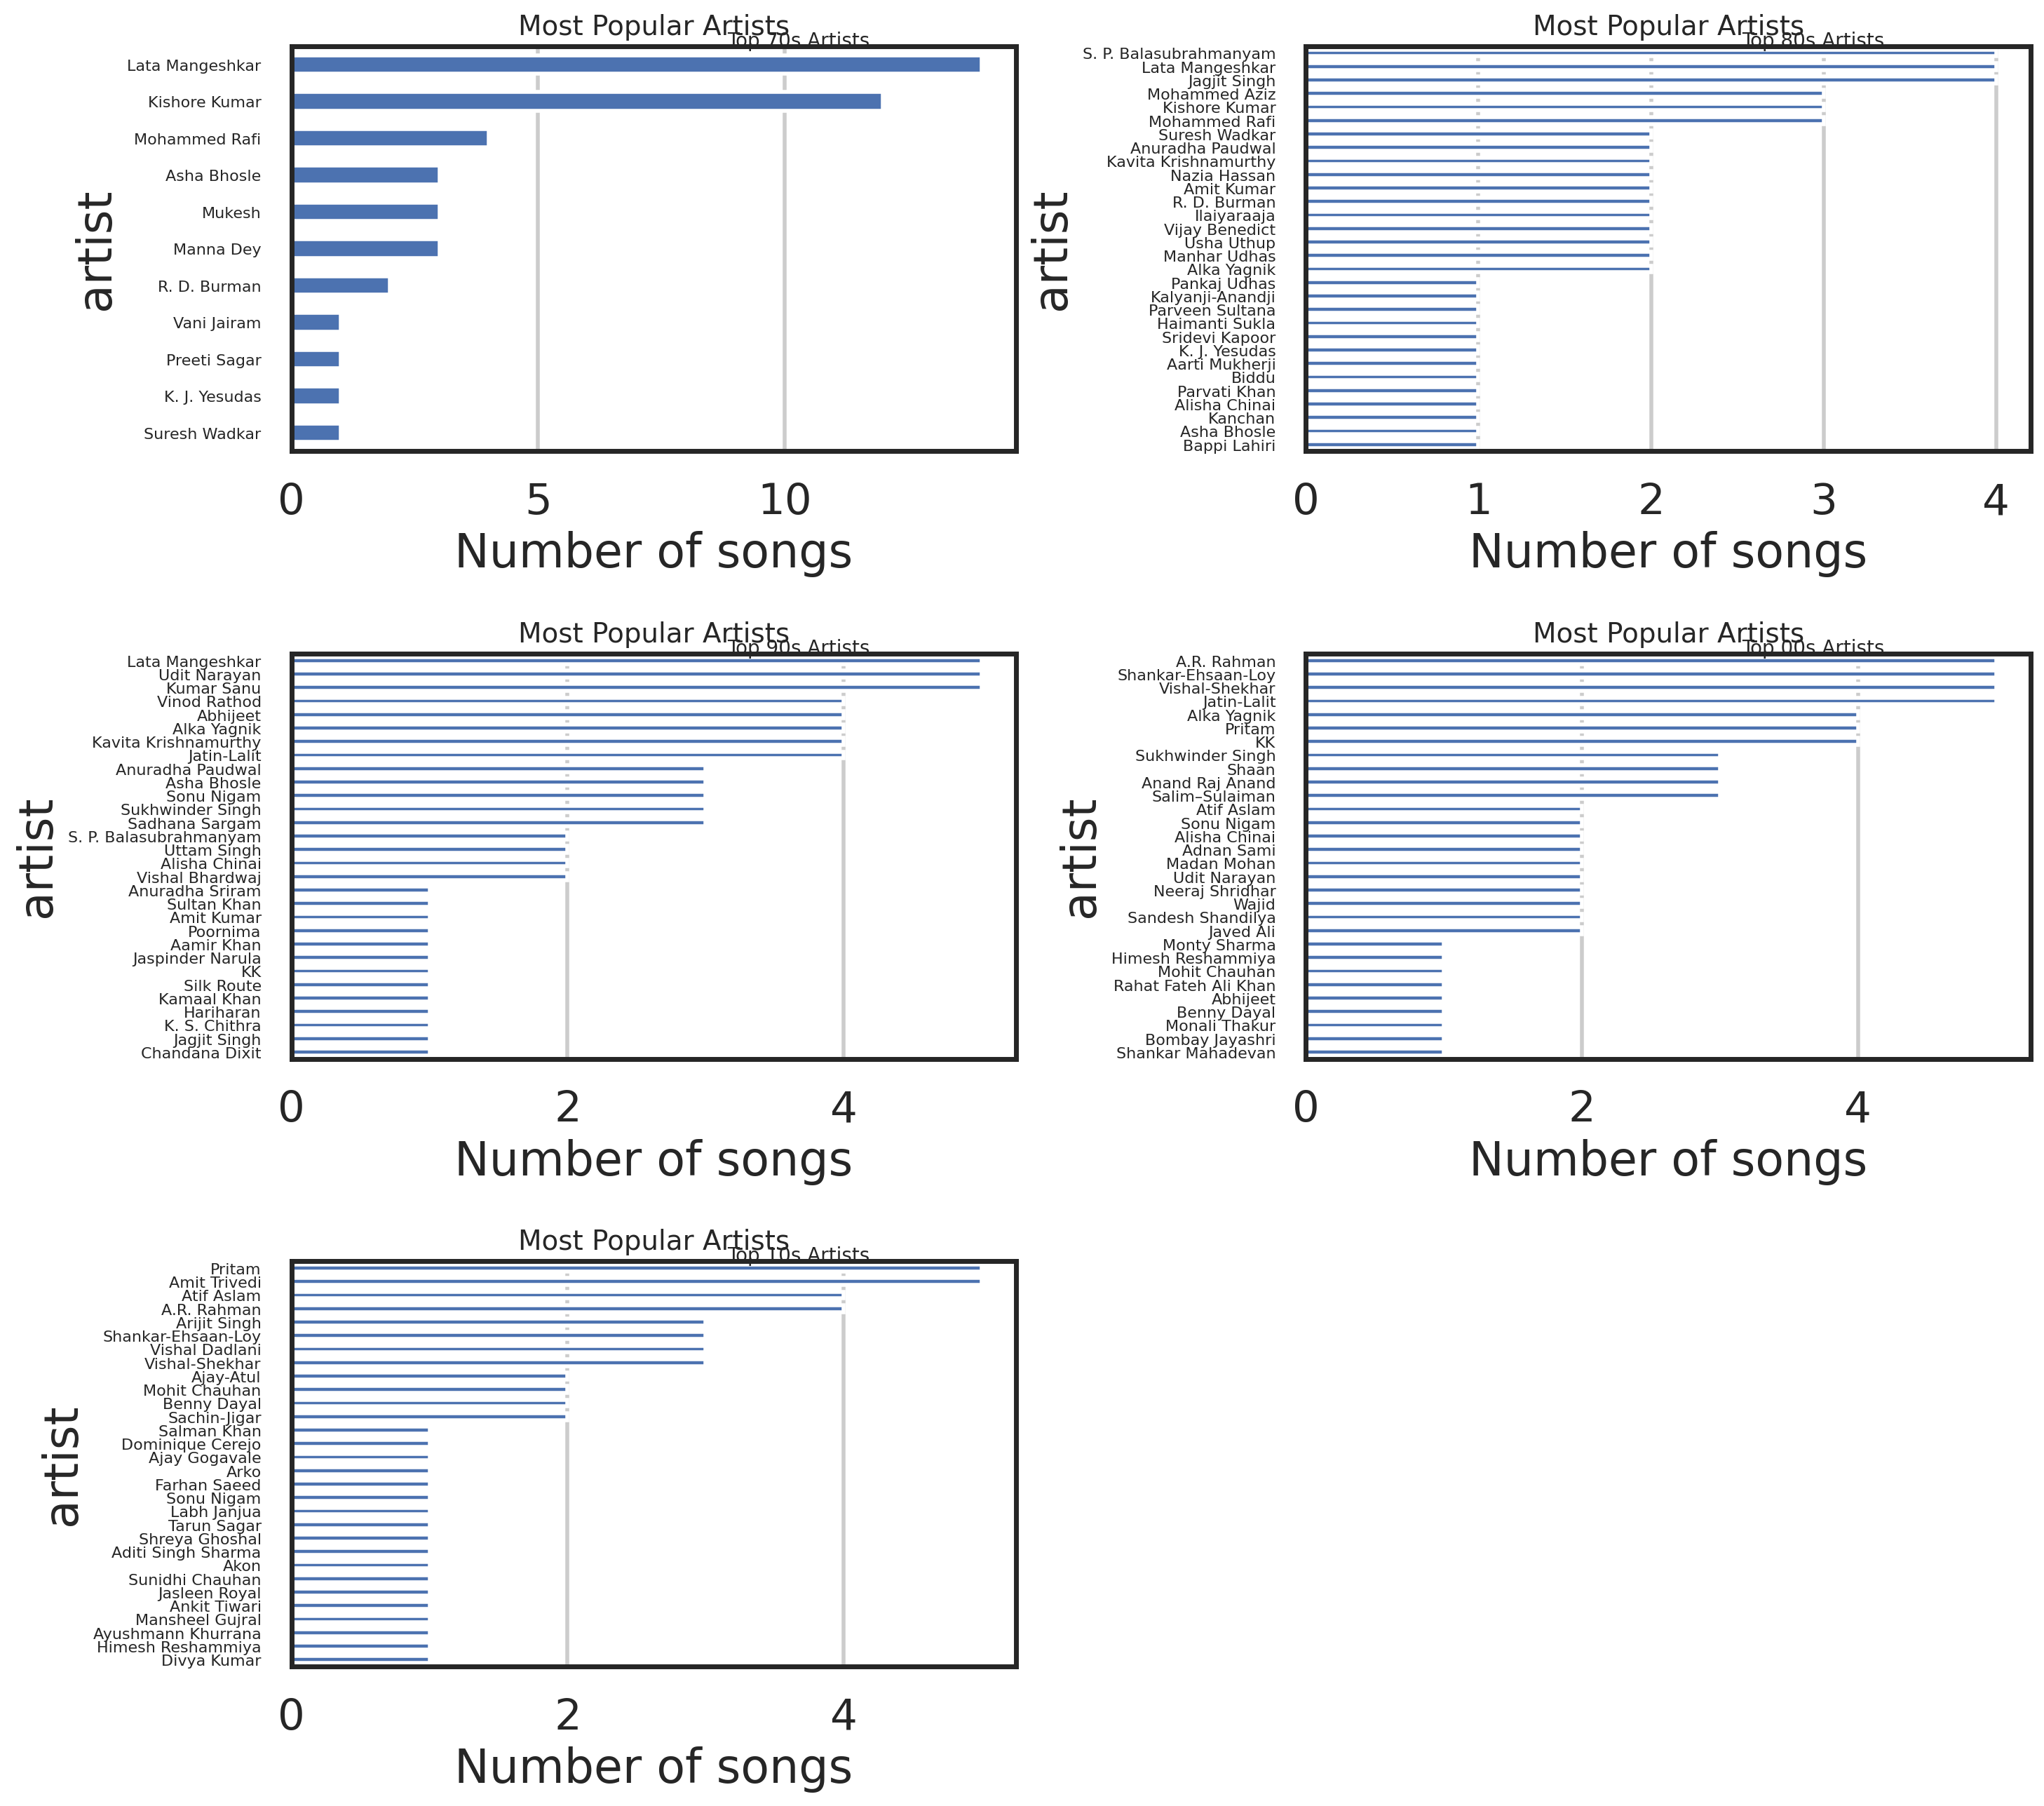

In [ ]:
n = len(df_list)

rows = math.ceil(n / 2)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

for i in range(n):
    ax = df_list[i]['artist'].value_counts().sort_values().tail(30).plot.barh(ax=axes[i])

    ax.xaxis.grid(True)
    ax.set(xlabel='Number of songs')
    ax.set_title('Most Popular Artists', fontsize=14)
    ax.annotate('Top {f} Artists'.format(f=decades[i]), xy=(0.7, 1), fontsize=10, ha='center', xycoords='axes fraction')

    ax.tick_params(axis='y', labelsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, rotation=0, ha='right')

for j in range(n, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()

In [ ]:
from gensim.models import Word2Vec
from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
class_dict={
    0:'negative',
    1:'neutral',
    2:'positive'
}

In [ ]:
def predict_sentiment(lyrics):
  model_name = "bert-base-multilingual-cased"
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


  text = lyrics
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

  with torch.no_grad():
      outputs = model(**inputs)
      logits = outputs.logits
      predicted_class = torch.argmax(logits, dim=1).item()

  return class_dict[predicted_class]


In [ ]:
for i in range(len(df_list)):
  df_list[i]['sentiment'] = df_list[i]['lyrics'].apply(predict_sentiment)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkp

In [ ]:
df_list[0].head()

name           artist  \
0       Pal Pal Dil Ke Paas    Kishore Kumar   
2     Salame Ishq Meri Jaan  Lata Mangeshkar   
5         Mehbooba Mehbooba     R. D. Burman   
7  Zindagi Kaisi Hai Paheli        Manna Dey   
9     Meri Bheegi Bheegi Si    Kishore Kumar   

                                          album_name release_date  \
0     Blackmail (Original Motion Picture Soundtrack)   1973-01-01   
2  Muqaddar Ka Sikandar (Original Motion Picture ...   1978-12-01   
5        Sholay (Original Motion Picture Soundtrack)   1975-01-01   
7         Anand (Original Motion Picture Soundtrack)   1970-12-31   
9                                            Anamika   1972-01-01   

                                              lyrics sentiment  
0  पल पल दिल के पास तुम रहती हो पल पल दिल के पास ...   neutral  
2  इश्क़ वालो से न पूछो की उनकी रात का आलम तनहा कै...  negative  
5  मेहबूबा उह मेहबूबा उह मेहबूबा उह उह मेहबूबा ऐ ...   neutral  
7  इंग्लिश जिंदगी कैसी है पहेली हाय कभी तोह हसए क...  positive  
9  मेरी भीगी भीगी सी पलकों पे रह गए जैसे मेरे सपन...  negative

In [ ]:
class_to_num={
    'negative':0,
    'neutral':1,
    'positive':2
}

In [ ]:
for i in range(len(df_list)):
  df_list[i]['sentiment']=df_list[i]['sentiment'].apply(lambda x : class_to_num[x])

<ipython-input-56-5e4fb5ea8d8f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year


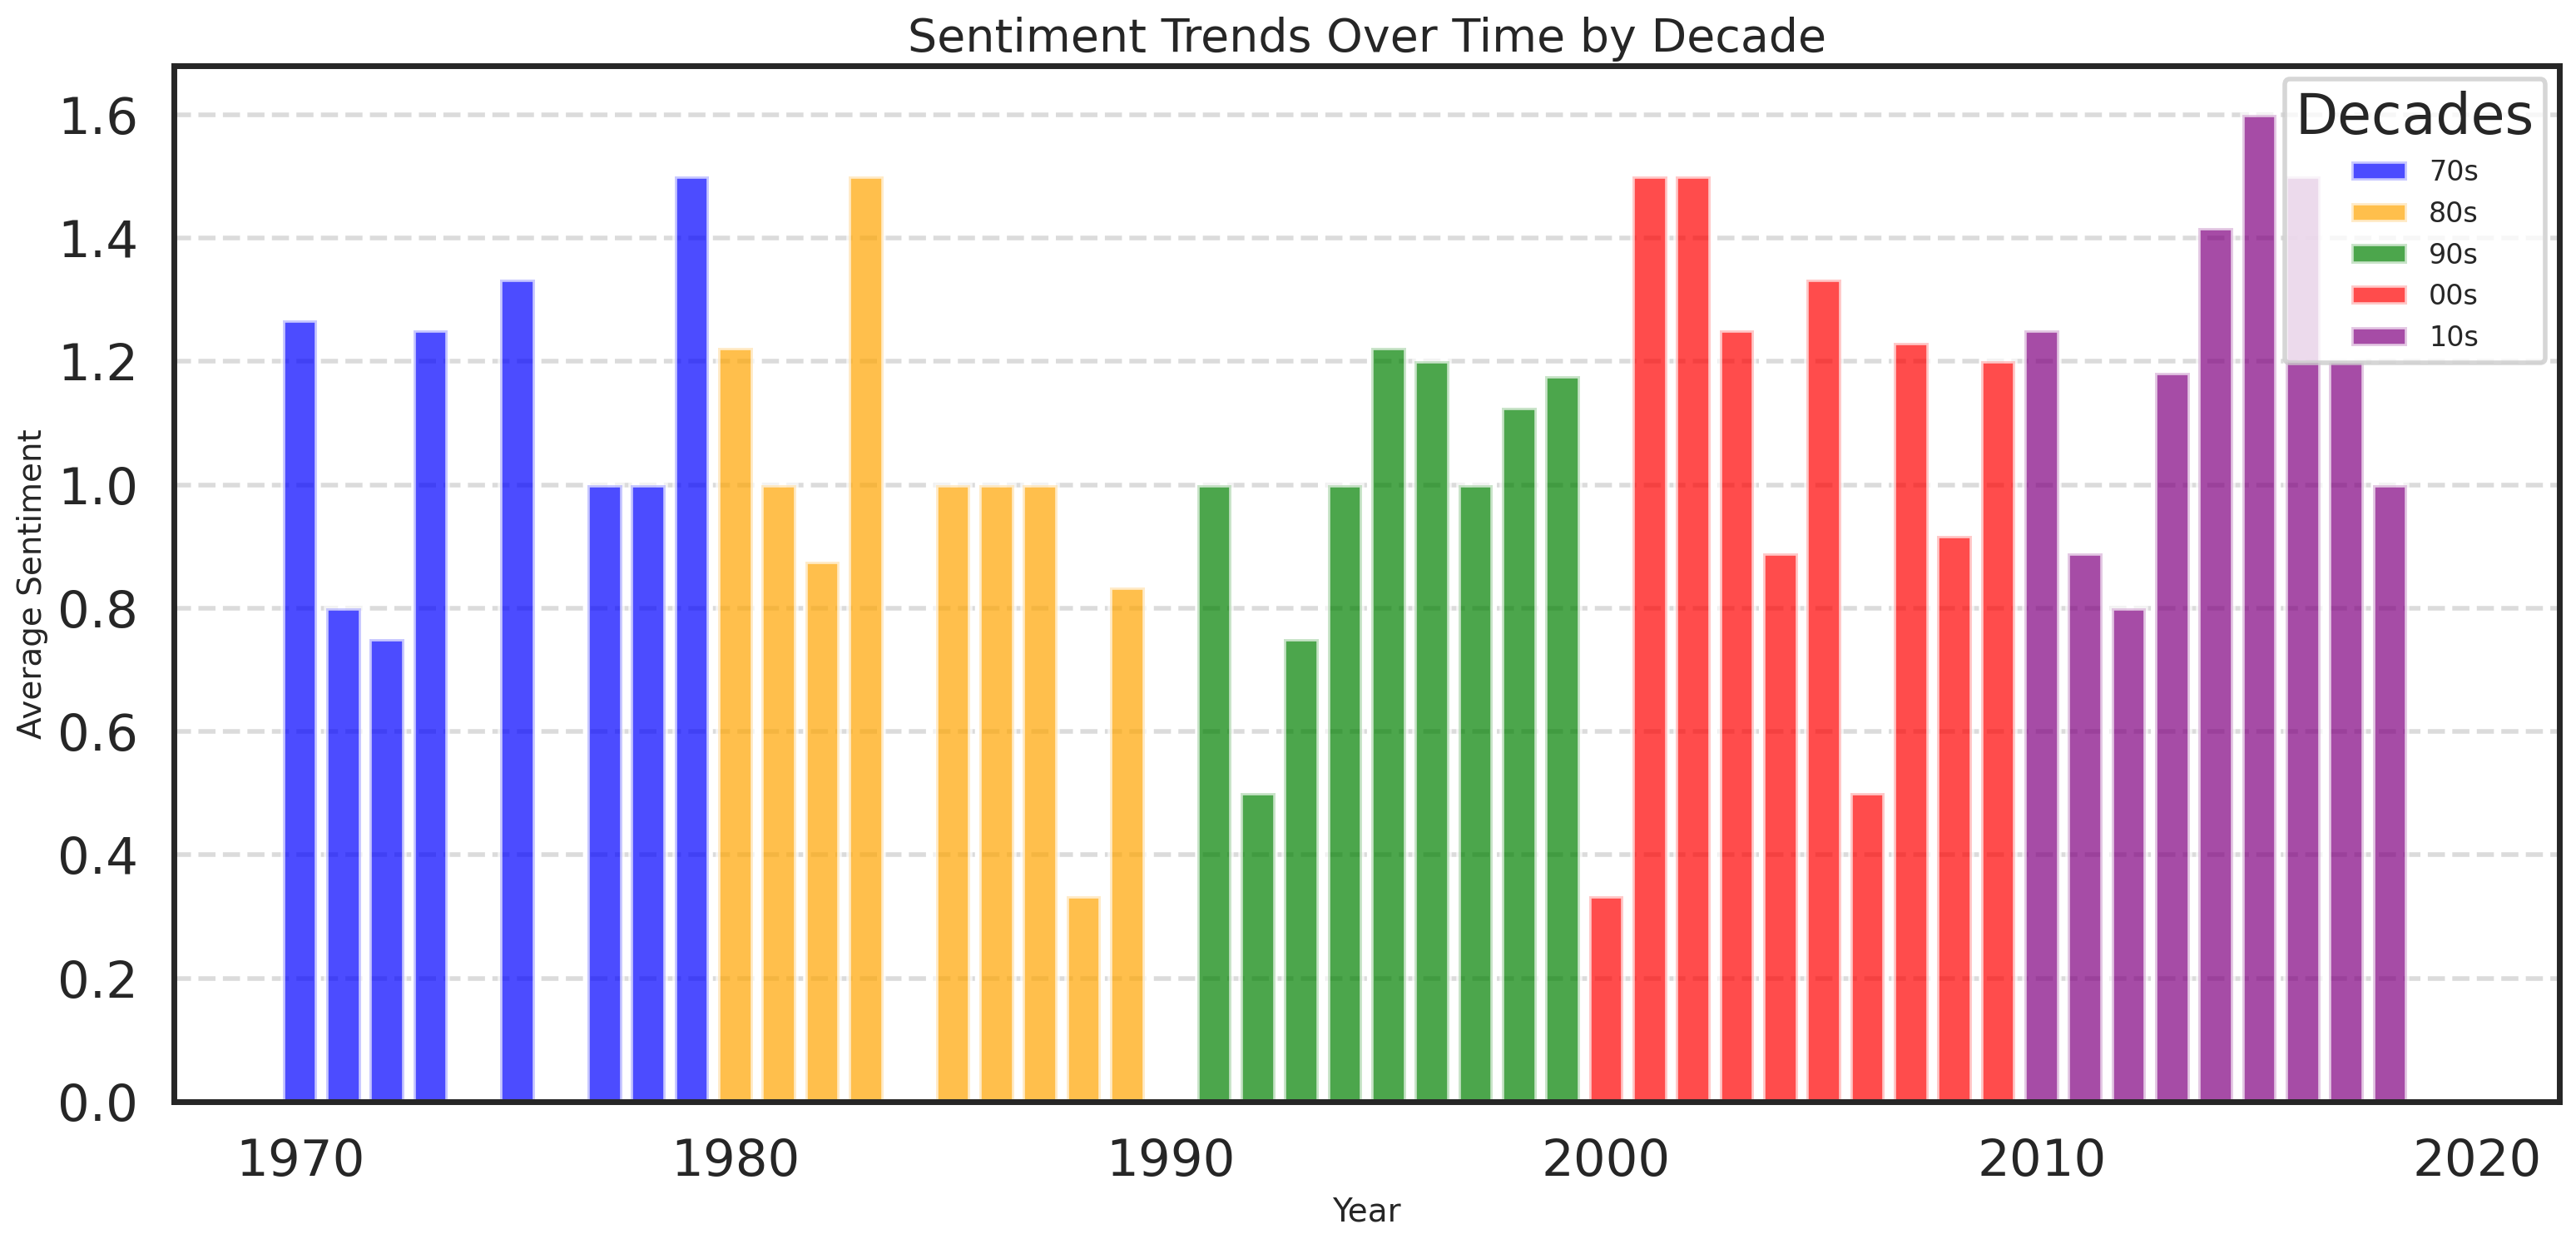

In [ ]:
decade_ranges = {
    '70s': (1970, 1979),
    '80s': (1980, 1989),
    '90s': (1990, 1999),
    '00s': (2000, 2009),
    '10s': (2010, 2019)
}

plt.figure(figsize=(16, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple']
decades = ['70s', '80s', '90s', '00s', '10s']

for i, (df, decade) in enumerate(zip(df_list, decades)):
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    df = df.dropna(subset=['release_date'])

    df['year'] = df['release_date'].dt.year

    start_year, end_year = decade_ranges[decade]
    df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    avg_sentiment_per_year = df.groupby('year')['sentiment'].mean()

    plt.bar(
        avg_sentiment_per_year.index,
        avg_sentiment_per_year.values,
        color=colors[i],
        alpha=0.7,
        label=decade
    )

plt.title('Sentiment Trends Over Time by Decade', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend(title="Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<ipython-input-57-60fd0f9346a4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year


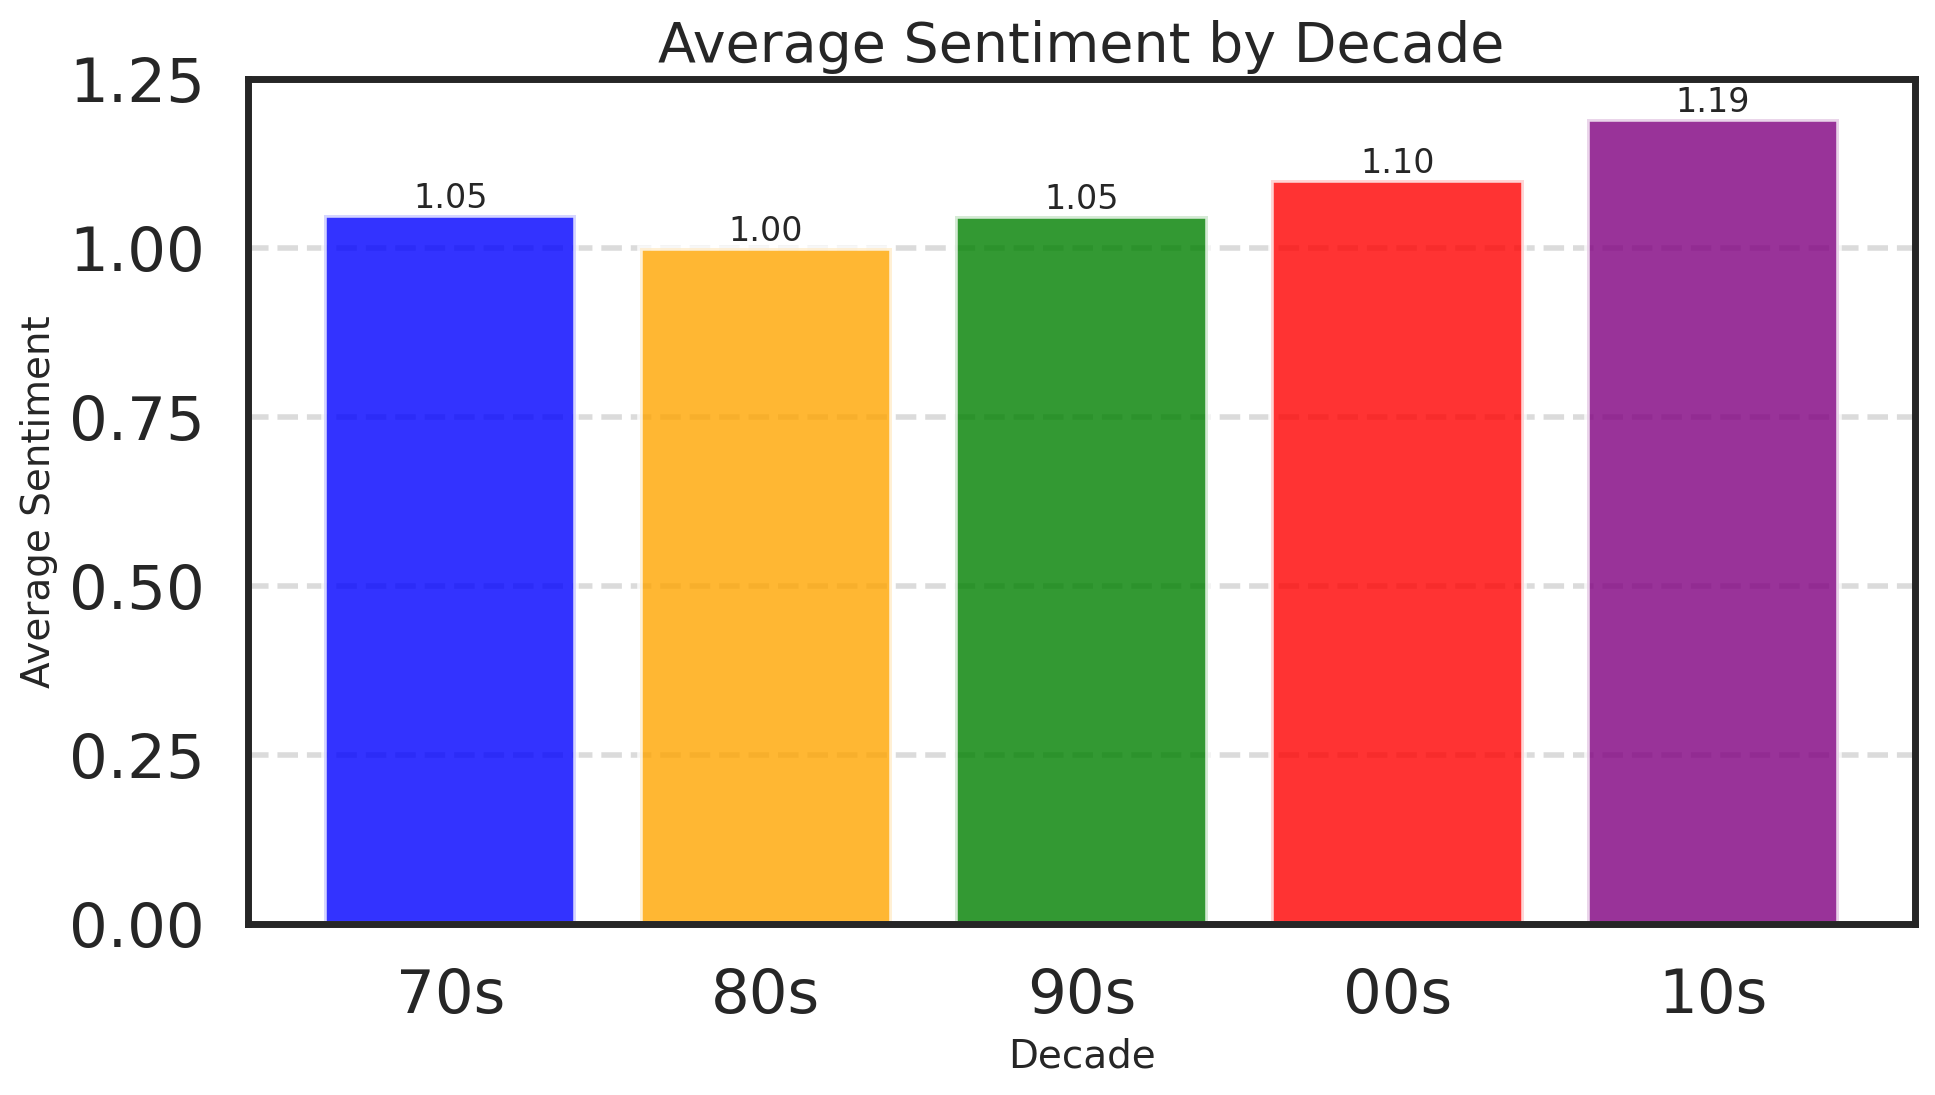

In [ ]:
decades = ['70s', '80s', '90s', '00s', '10s']


average_sentiments = []

for i, df in enumerate(df_list):

    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    df = df.dropna(subset=['release_date'])

    df['year'] = df['release_date'].dt.year
    start_year, end_year = decade_ranges[decades[i]]
    df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    avg_sentiment = df['sentiment'].mean()
    average_sentiments.append(avg_sentiment)

plt.figure(figsize=(10, 6))
plt.bar(decades, average_sentiments, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.8)

plt.title('Average Sentiment by Decade', fontsize=20)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(average_sentiments):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-67-d126d5b63ec9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year


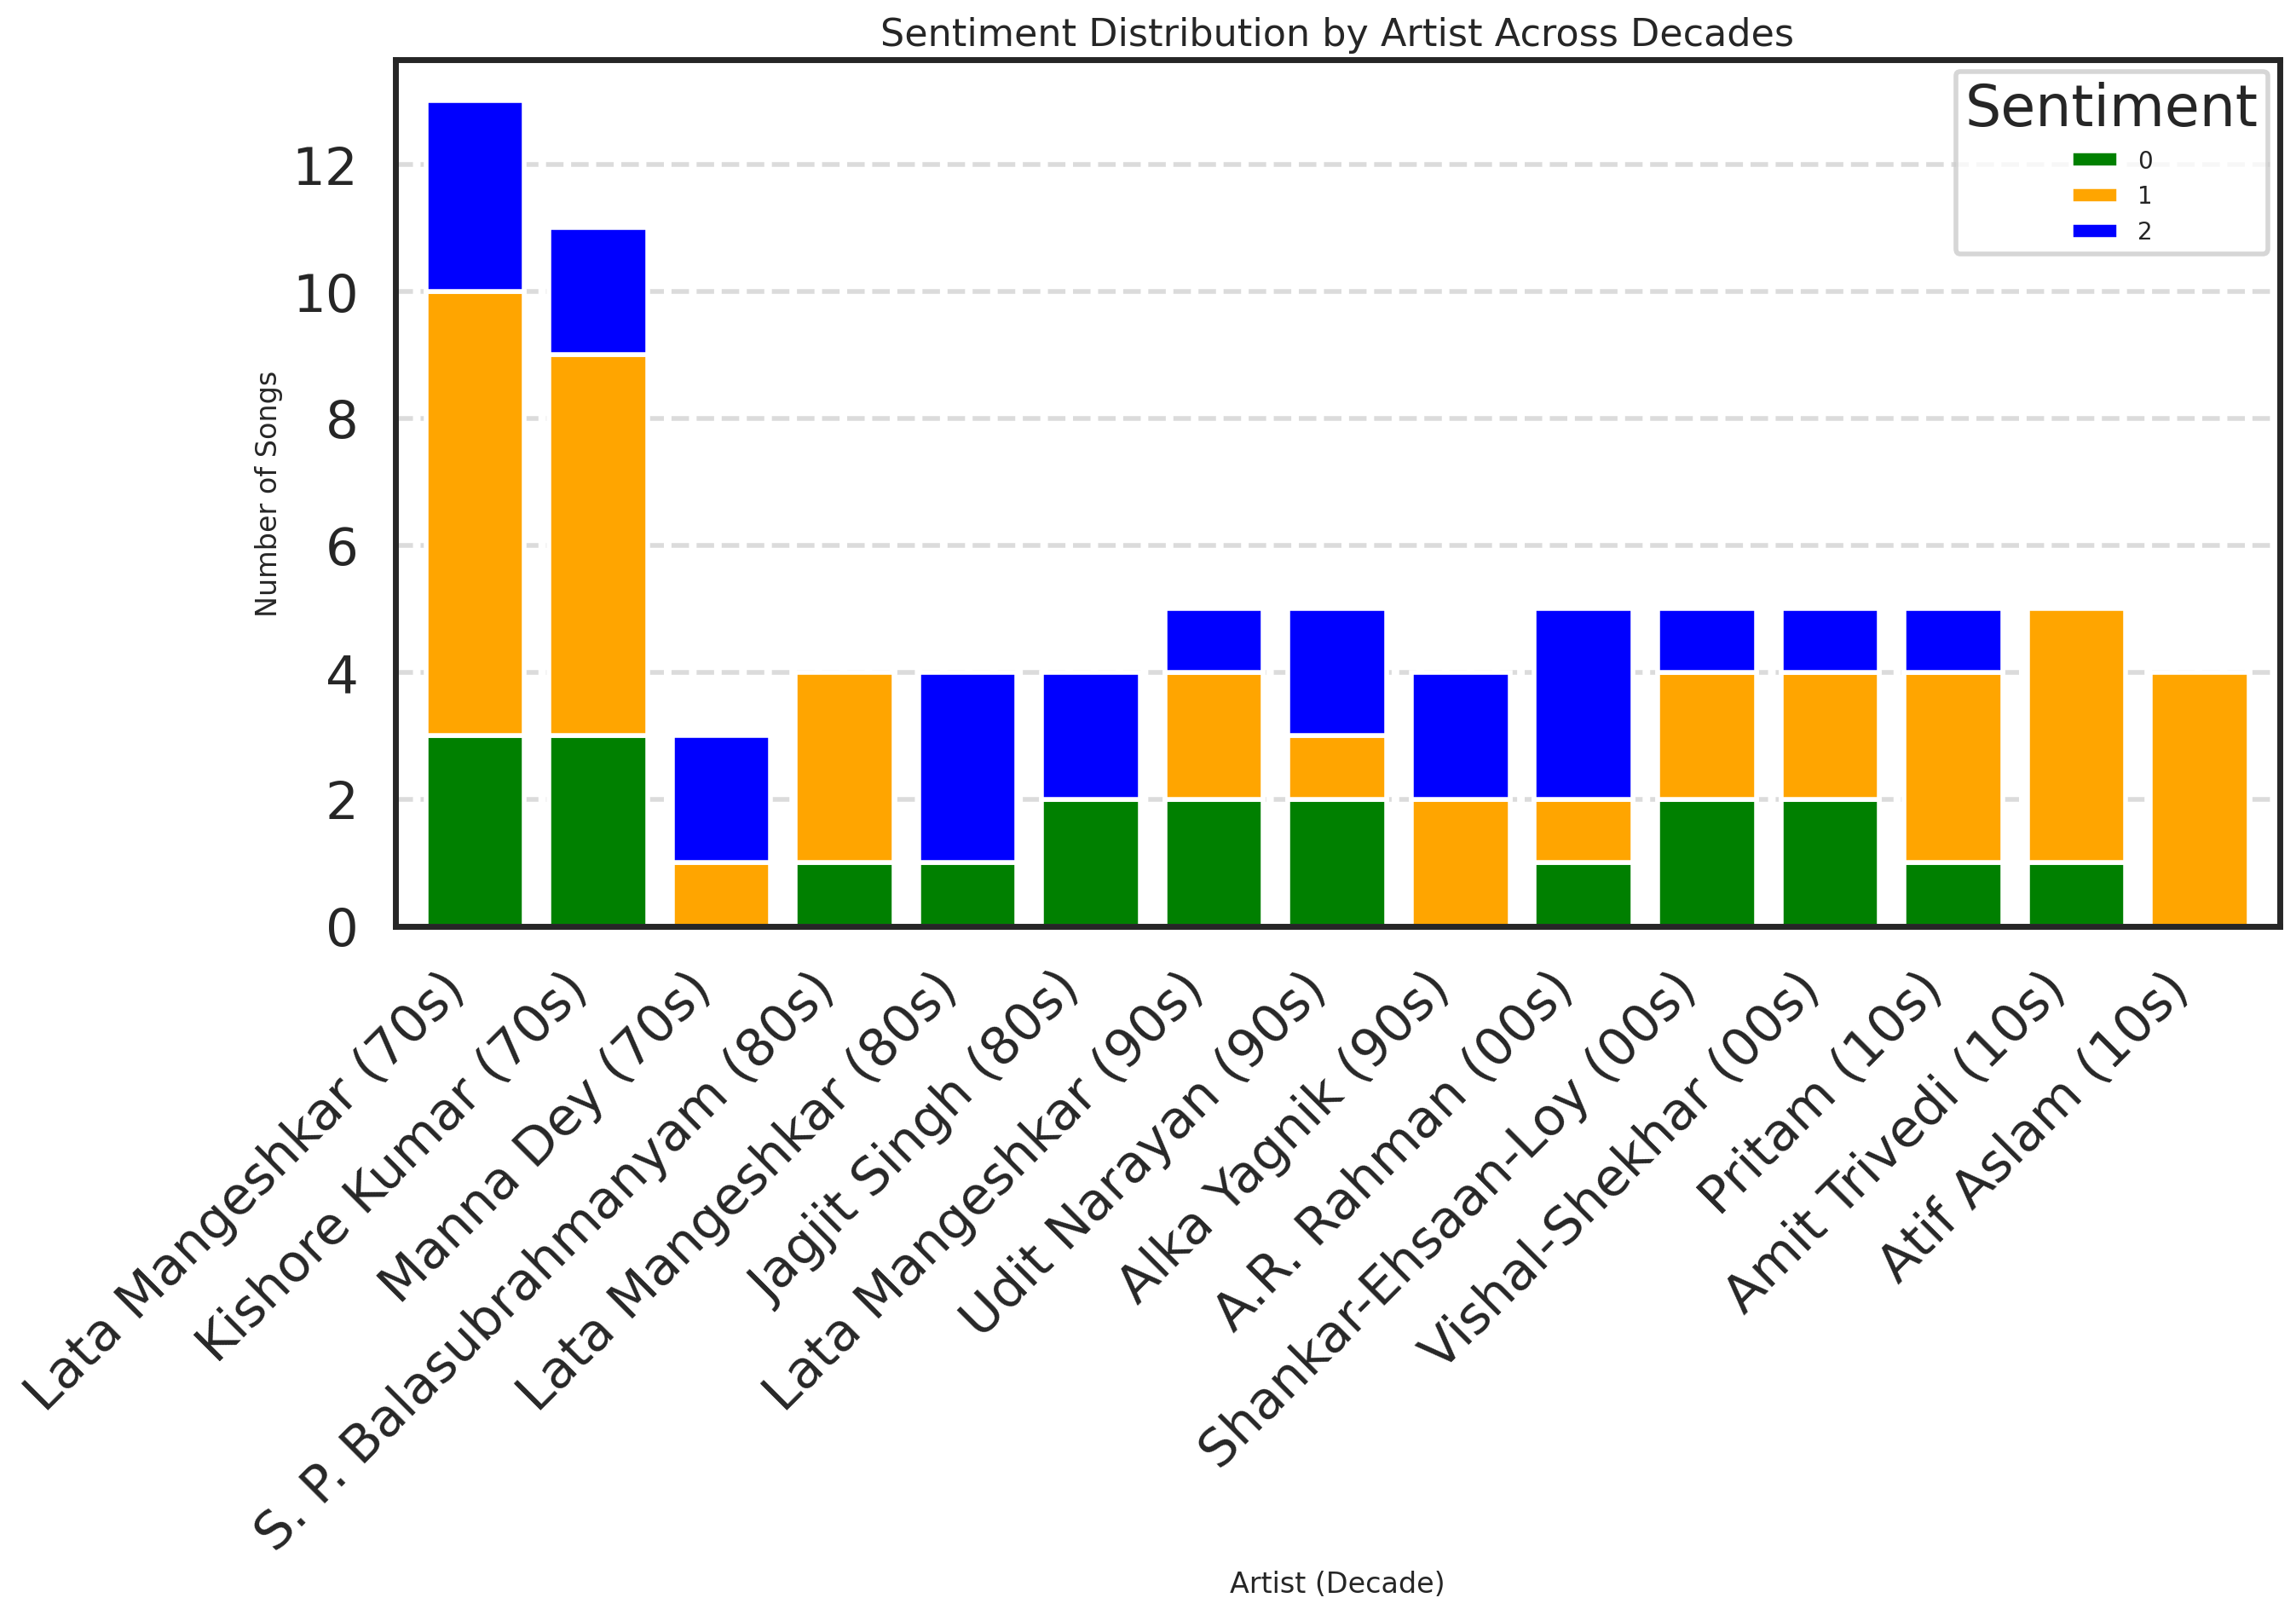

In [ ]:
sentiment_categories = [0, 1, 2]
colors = ['green', 'orange', 'blue']

summary_data = []
for i, (df, decade) in enumerate(zip(df_list, decades)):
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df = df.dropna(subset=['release_date'])
    df['year'] = df['release_date'].dt.year

    start_year, end_year = decade_ranges[decade]
    df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    if df.empty:
        print(f"No data for {decade}")
        continue

    top_artists = df['artist'].value_counts().head(3).index

    for artist in top_artists:
        artist_data = df[df['artist'] == artist]
        sentiment_counts = artist_data['sentiment'].value_counts()
        sentiment_proportions = {cat: sentiment_counts.get(cat, 0) for cat in sentiment_categories}
        summary_data.append({
            'decade': decade,
            'artist': artist,
            **sentiment_proportions
        })

summary_df = pd.DataFrame(summary_data)

summary_df = summary_df[['decade', 'artist', 0, 1, 2]]

summary_df.set_index(['decade', 'artist'], inplace=True)

fig, ax = plt.subplots(figsize=(14, 10))
summary_df.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax,
    figsize=(14, 10),
    width=0.8
)

ax.set_xticks(range(len(summary_df)))
ax.set_xticklabels([f"{artist} ({decade})" for decade, artist in summary_df.index], rotation=45, ha='right')
ax.set_title("Sentiment Distribution by Artist Across Decades", fontsize=16)
ax.set_xlabel("Artist (Decade)", fontsize=12)
ax.set_ylabel("Number of Songs", fontsize=12)
ax.legend(title="Sentiment", labels=sentiment_categories, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertModel.from_pretrained("bert-base-multilingual-cased")

In [ ]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding="max_length")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

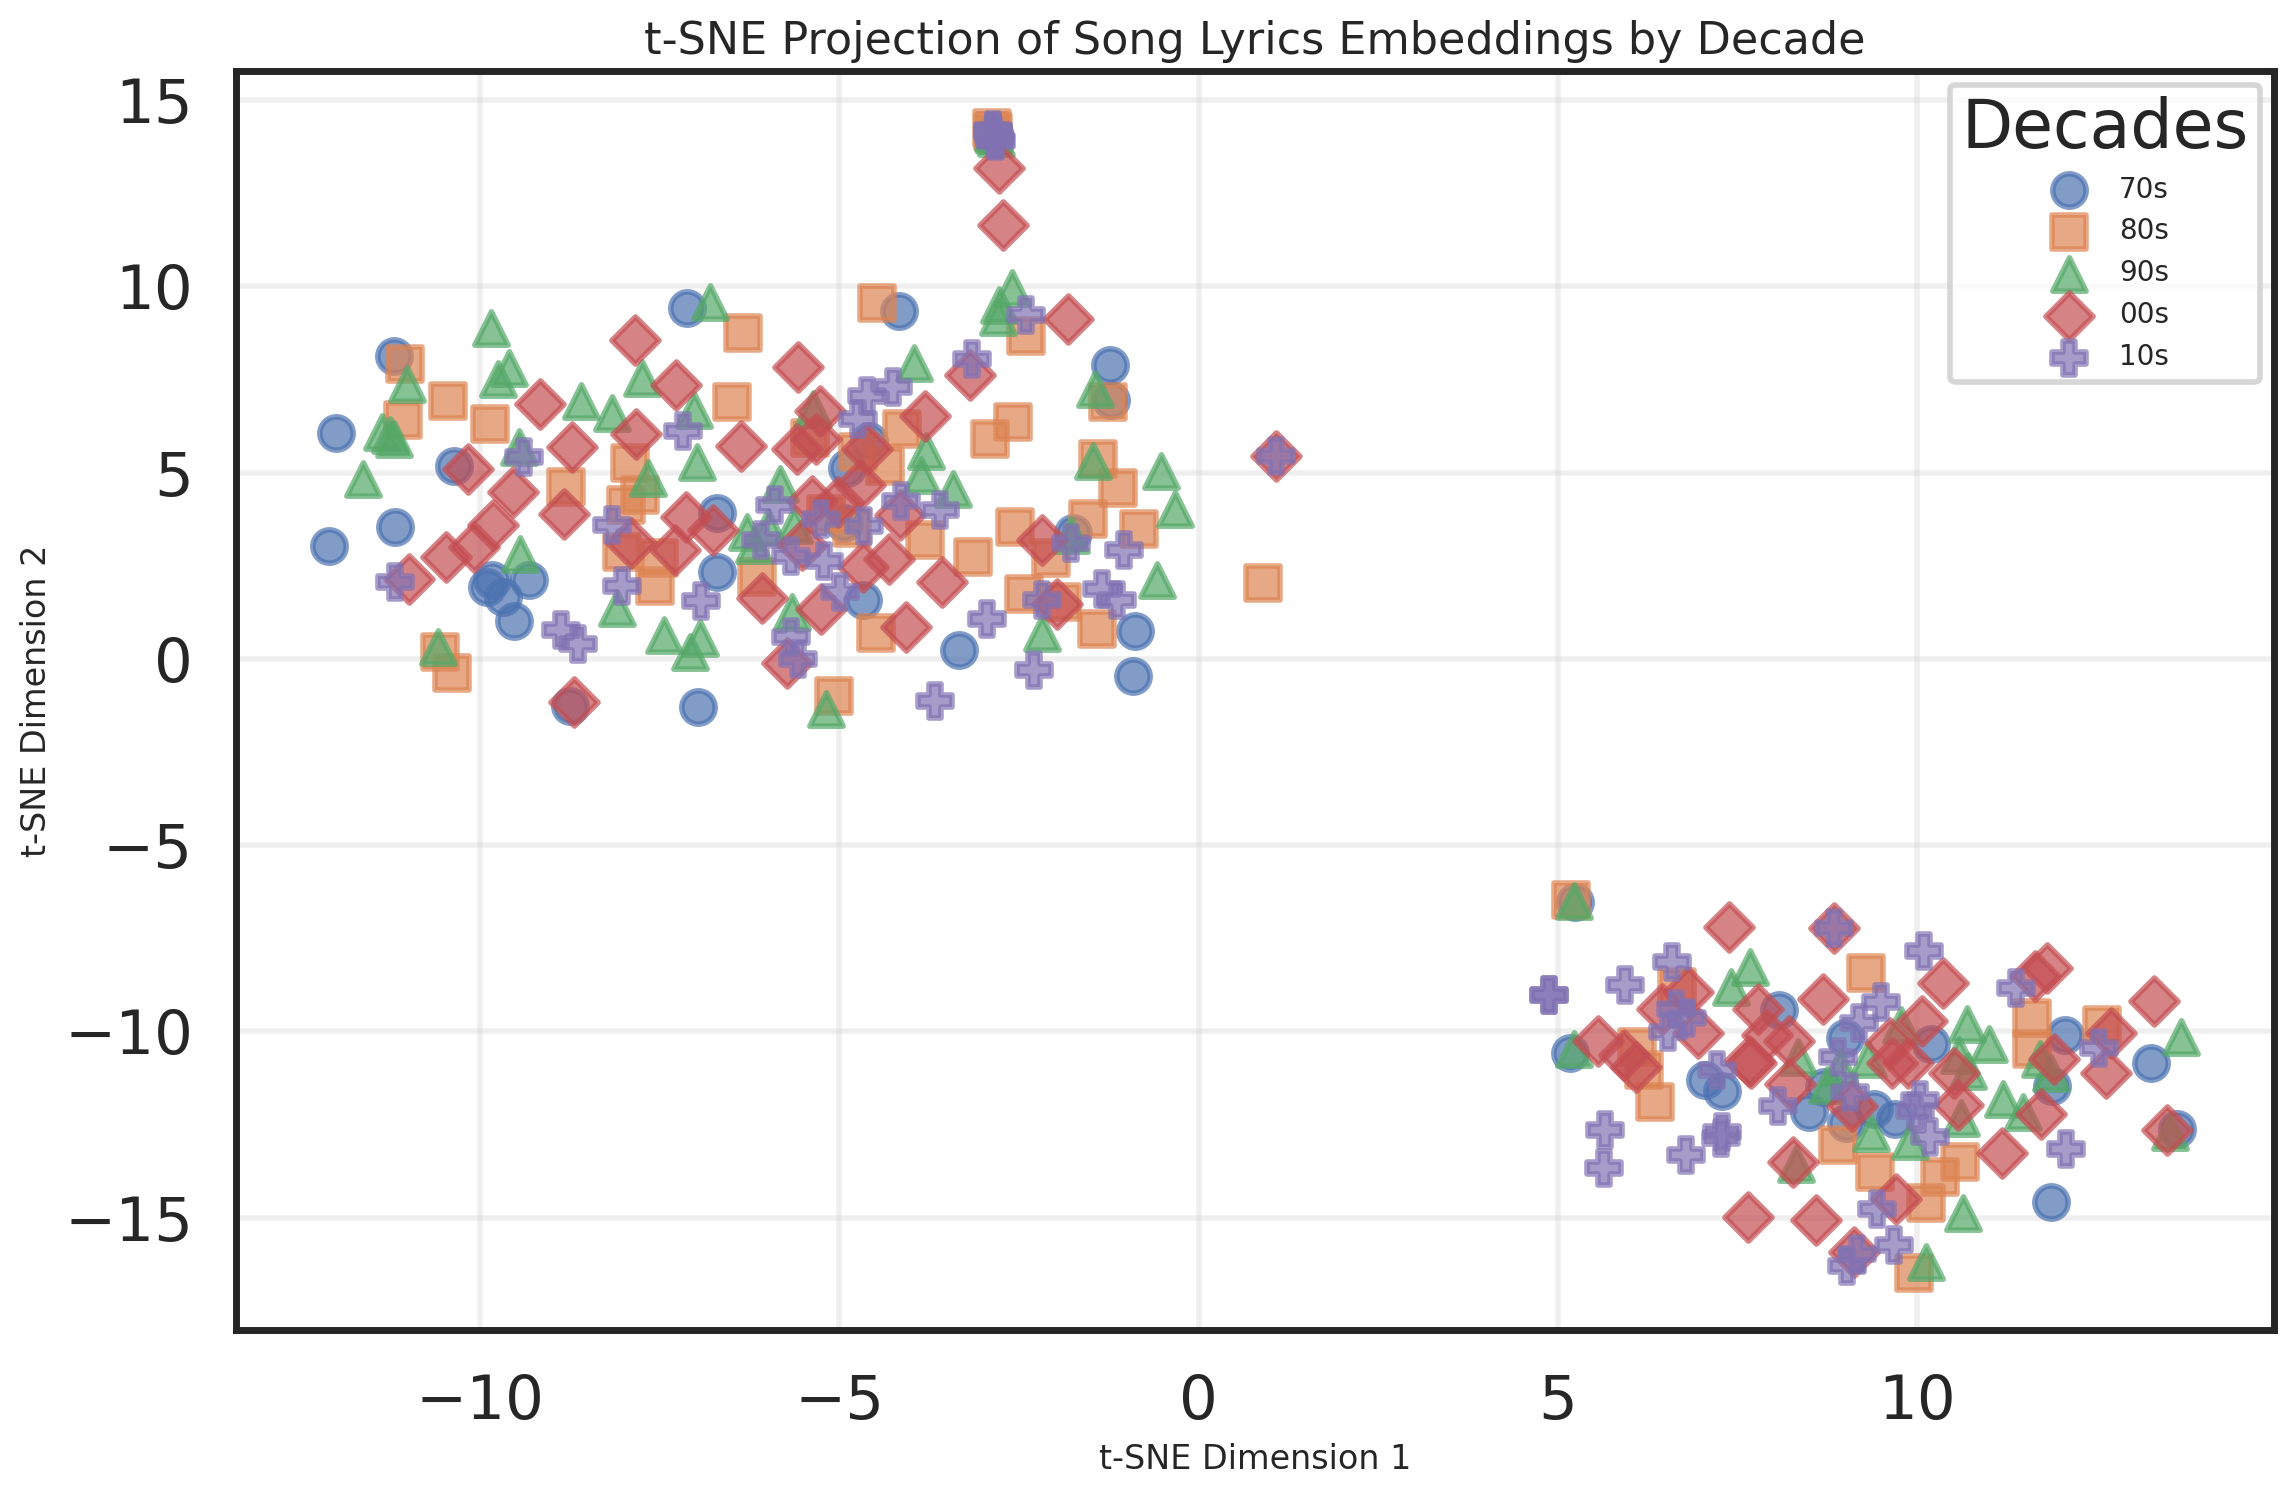

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

decade_markers = ['o', 's', '^', 'D', 'P']
decade_labels = ["70s", "80s", "90s", "00s", "10s"]

embeddings = []
decade_indices = []

for i, df in enumerate(df_list):
    decade_embeddings = [get_bert_embedding(lyric) for lyric in df['lyrics']]
    embeddings.extend(decade_embeddings)
    decade_indices.extend([i] * len(decade_embeddings))

embeddings = np.array(embeddings)
decade_indices = np.array(decade_indices)

tsne = TSNE(n_components=2, metric='cosine', random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(12, 8))

for i, marker in enumerate(decade_markers):
    decade_mask = decade_indices == i
    plt.scatter(
        reduced_embeddings[decade_mask, 0],
        reduced_embeddings[decade_mask, 1],
        marker=marker,
        label=decade_labels[i],
        alpha=0.7
    )

plt.title("t-SNE Projection of Song Lyrics Embeddings by Decade", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title="Decades", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans


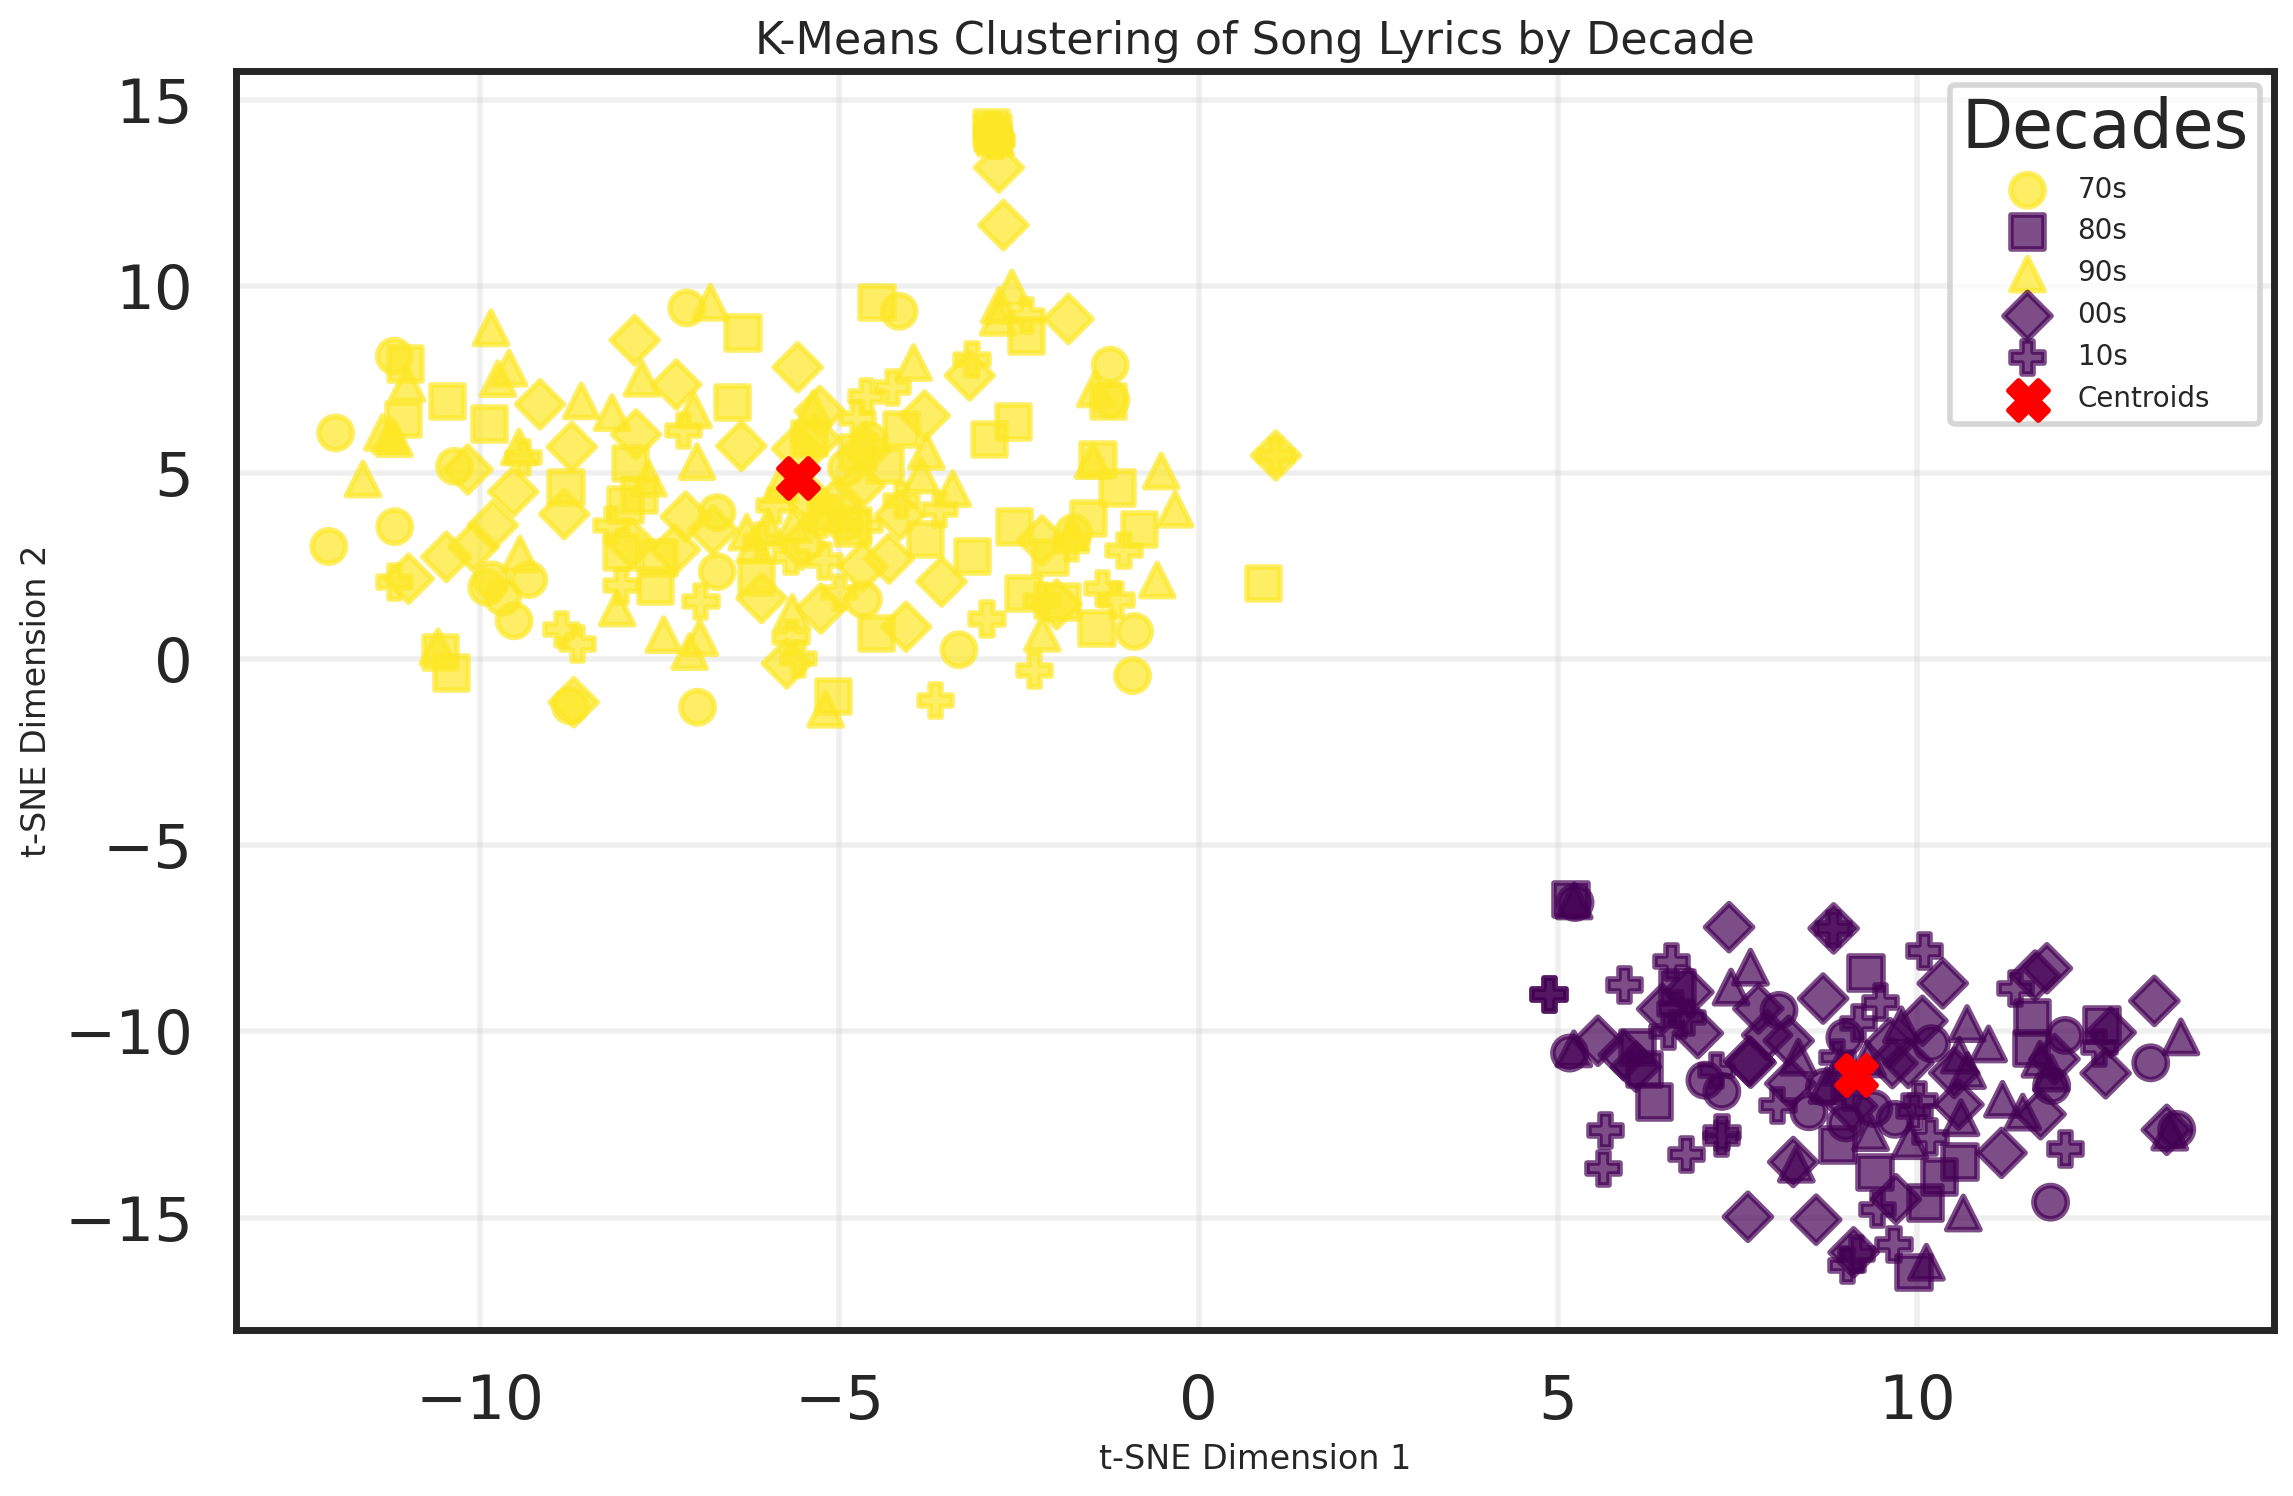

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

plt.figure(figsize=(12, 8))

decade_markers = ['o', 's', '^', 'D', 'P']
decade_labels = ["70s", "80s", "90s", "00s", "10s"]

for i, marker in enumerate(decade_markers):
    decade_mask = (decade_indices == i)
    plt.scatter(
        reduced_embeddings[decade_mask, 0],
        reduced_embeddings[decade_mask, 1],
        c=clusters[decade_mask],
        marker=marker,
        cmap='viridis',
        label=decade_labels[i],
        alpha=0.7
    )

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering of Song Lyrics by Decade", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title="Decades", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


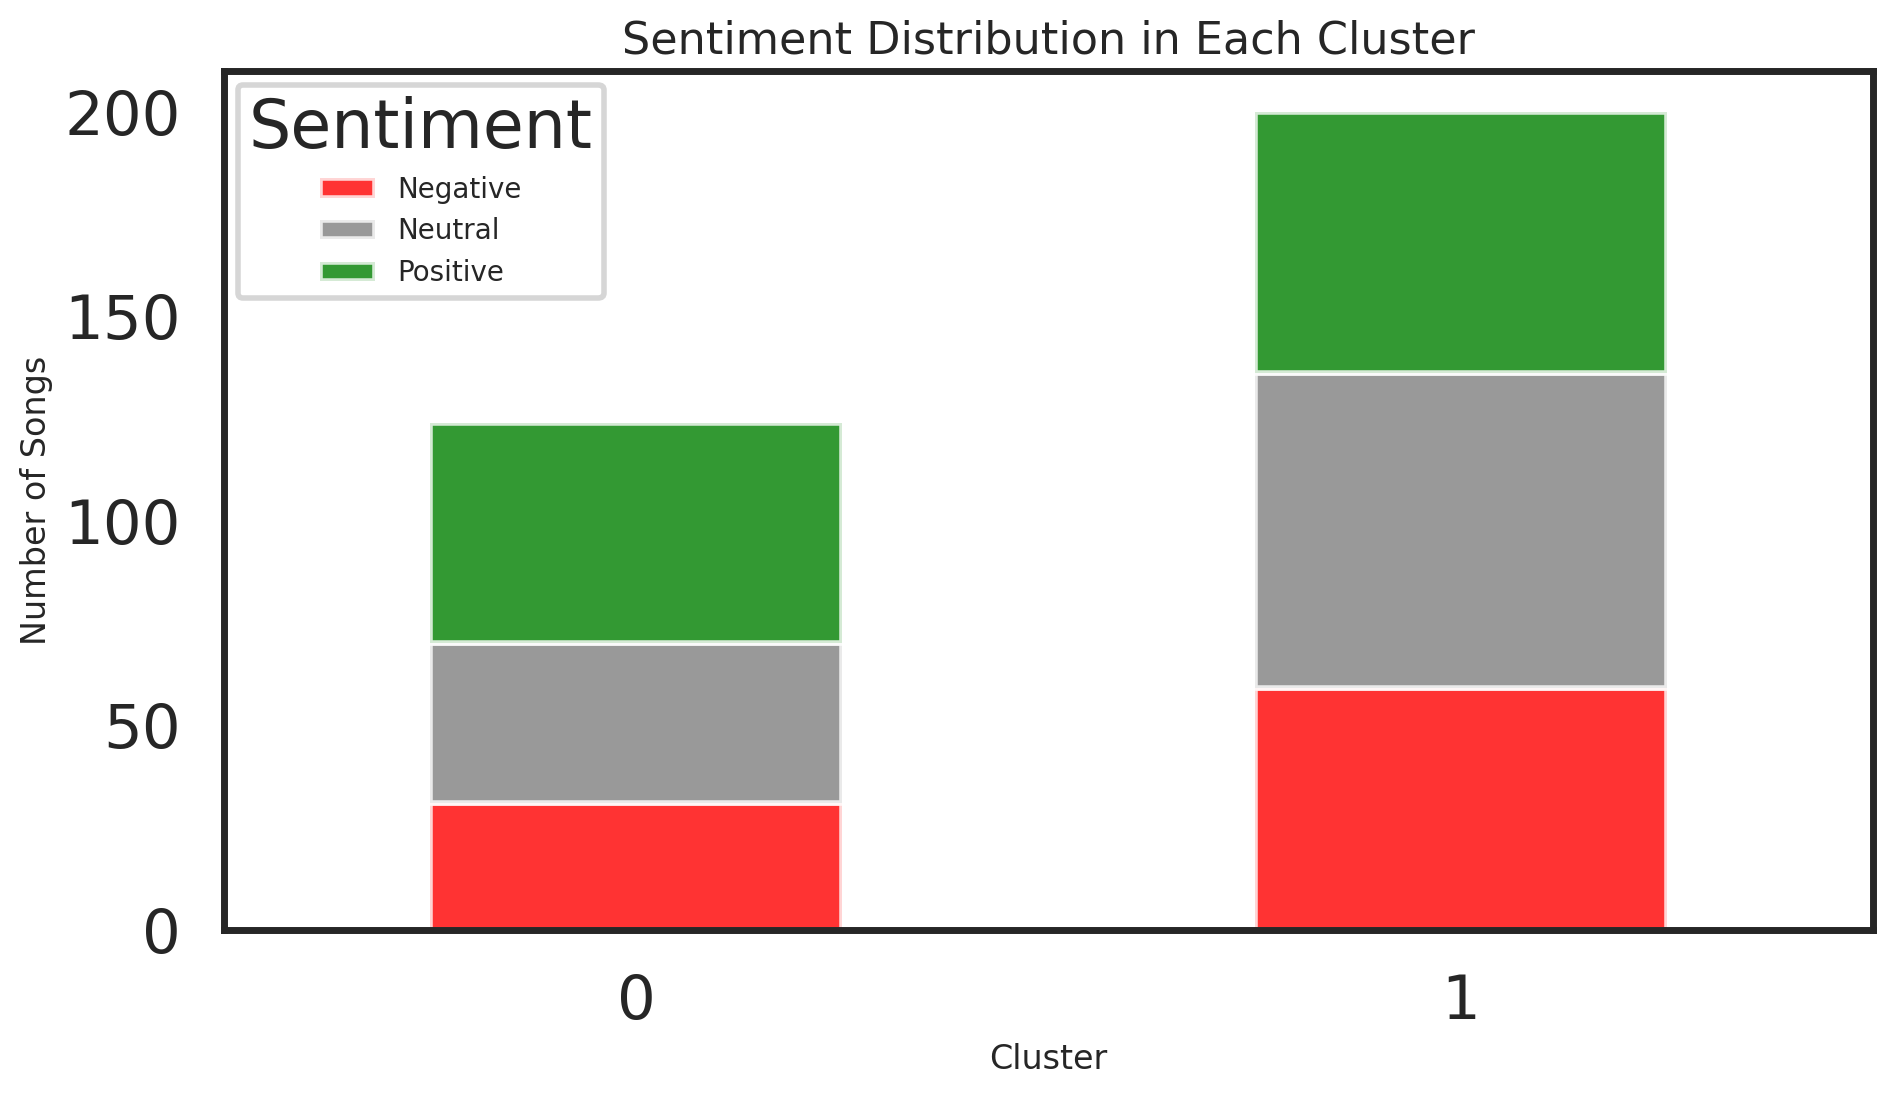

In [ ]:
cluster_data = pd.DataFrame({
    'cluster': clusters,
    'sentiment': np.concatenate([df['sentiment'].values for df in df_list])
})

sentiment_distribution = cluster_data.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0)

sentiment_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['red', 'gray', 'green'],
    alpha=0.8
)

plt.title("Sentiment Distribution in Each Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.legend(title="Sentiment", labels=["Negative", "Neutral", "Positive"], fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
cluster_data.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0)

sentiment   0   1   2
cluster              
0          31  39  54
1          59  77  64

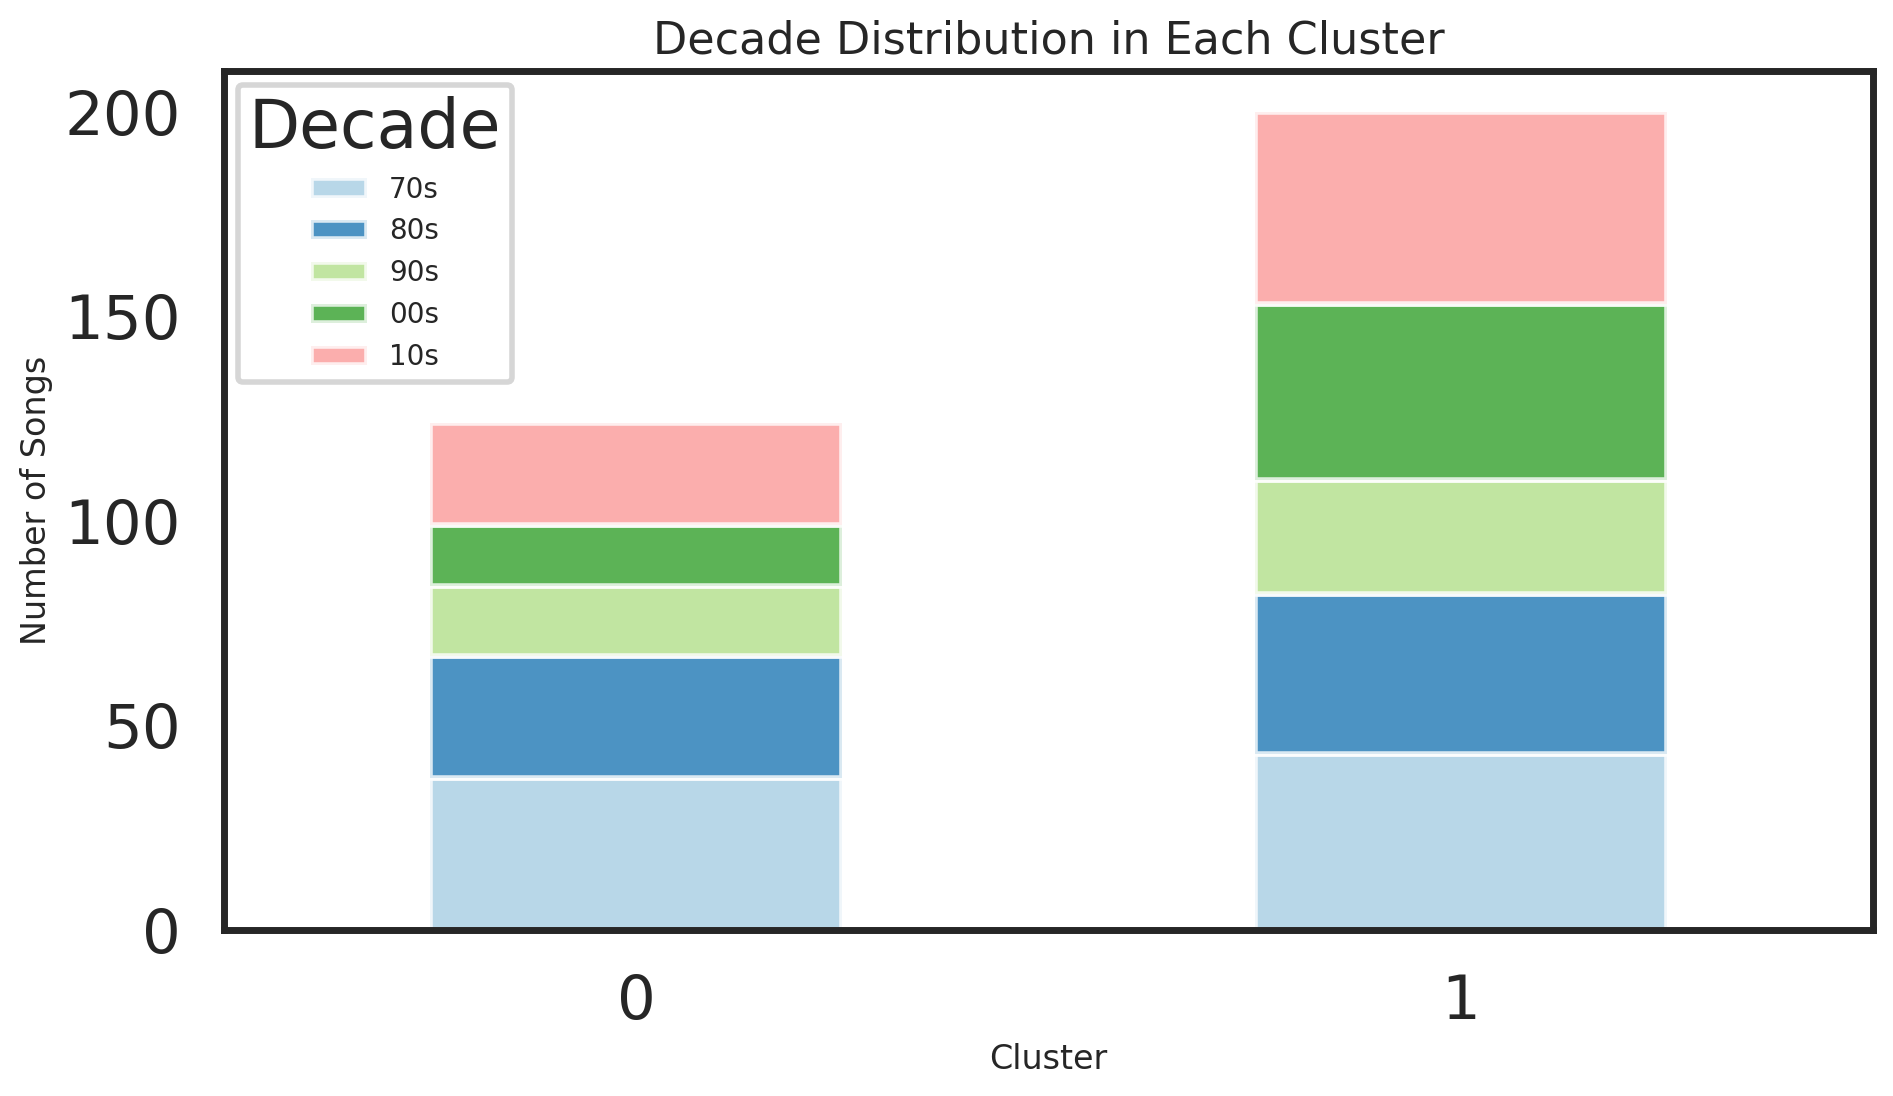

In [ ]:
decade_labels = ['70s', '80s', '90s', '00s', '10s']
decades = np.concatenate([[label] * len(df) for label, df in zip(decade_labels, df_list)])

cluster_decade_data = pd.DataFrame({
    'cluster': clusters,
    'decade': decades
})

decade_distribution = cluster_decade_data.groupby(['cluster', 'decade']).size().unstack(fill_value=0)

decade_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=plt.cm.Paired.colors,
    alpha=0.8
)

plt.title("Decade Distribution in Each Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.legend(title="Decade", labels=decade_labels, fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
cluster_decade_data.groupby(['cluster', 'decade']).size().unstack(fill_value=0)

decade   00s  10s  70s  80s  90s
cluster                         
0         37   30   17   15   25
1         43   39   28   43   47

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=d68b5c63f4901b9c81e36c3131658572d0d3552fa2ad5a5c31407727f8eb94e1
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
!sudo apt install fonts-noto
!pip install adjustText

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji
  fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:

In [ ]:
import fasttext

words = ["प्यार", "दुख", "डर", "खुशी", "चाँद", "शांत"]

for i, df in enumerate(df_list):
    lyrics_text = ' '.join(df['lyrics'].dropna().tolist())

    filename = f"decade_{decade_labels[i]}_corpus.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(lyrics_text)

    model = fasttext.train_unsupervised(filename, model='skipgram')

    print(f"\nTraining complete for the {decade_labels[i]} decade.")

    for word in words:
        similar_words = model.get_nearest_neighbors(word)
        print(f"Most similar words to '{word}' in {decade_labels[i]} decade:")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity}")
        print('\n' + '-'*50 + '\n')



Training complete for the 70s decade.
Most similar words to 'प्यार' in 70s decade:
0.9999696016311646: प्यासा
0.9999616146087646: इंग्लिश
0.9999591112136841: जाएगा
0.9999513626098633: पानी
0.9999509453773499: सौदा
0.9999496936798096: होगा
0.9999487996101379: हमारे
0.9999478459358215: टूटें
0.999947190284729: वालो
0.9999470114707947: वाले

--------------------------------------------------

Most similar words to 'दुख' in 70s decade:
0.9999907612800598: दिलदारी
0.9999898672103882: ज़िन्दगी
0.9999893307685852: लेकिन
0.9999873042106628: पलकों
0.9999868273735046: ख्वाबो
0.999986469745636: वाली
0.9999856948852539: अकेला
0.9999855160713196: दुल्हनिया
0.9999852776527405: करता
0.9999850988388062: दुनिया

--------------------------------------------------

Most similar words to 'डर' in 70s decade:
0.0: दिल
0.0: में
0.0: हो
0.0: भी
0.0: से
0.0: की
0.0: न
0.0: बदनाम
0.0: डूबी
0.0: हाथ

--------------------------------------------------

Most similar words to 'खुशी' in 70s decade:
0.999873399734497

<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding between subplots to ensure clarity
<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding between subplots to ensure clarity
<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 115 (s) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding between subplots to ensure clarity
<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 68 (D) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding between subplots to ensure clarity
<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 101 (e) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding between subplots to ensure clarity
<ipython-input-92-f14c9e13cd88>:72: UserWarning: Glyph 99 (c) missing from current font.
  plt.tight_layout(pad=4.0)  # Increase padding

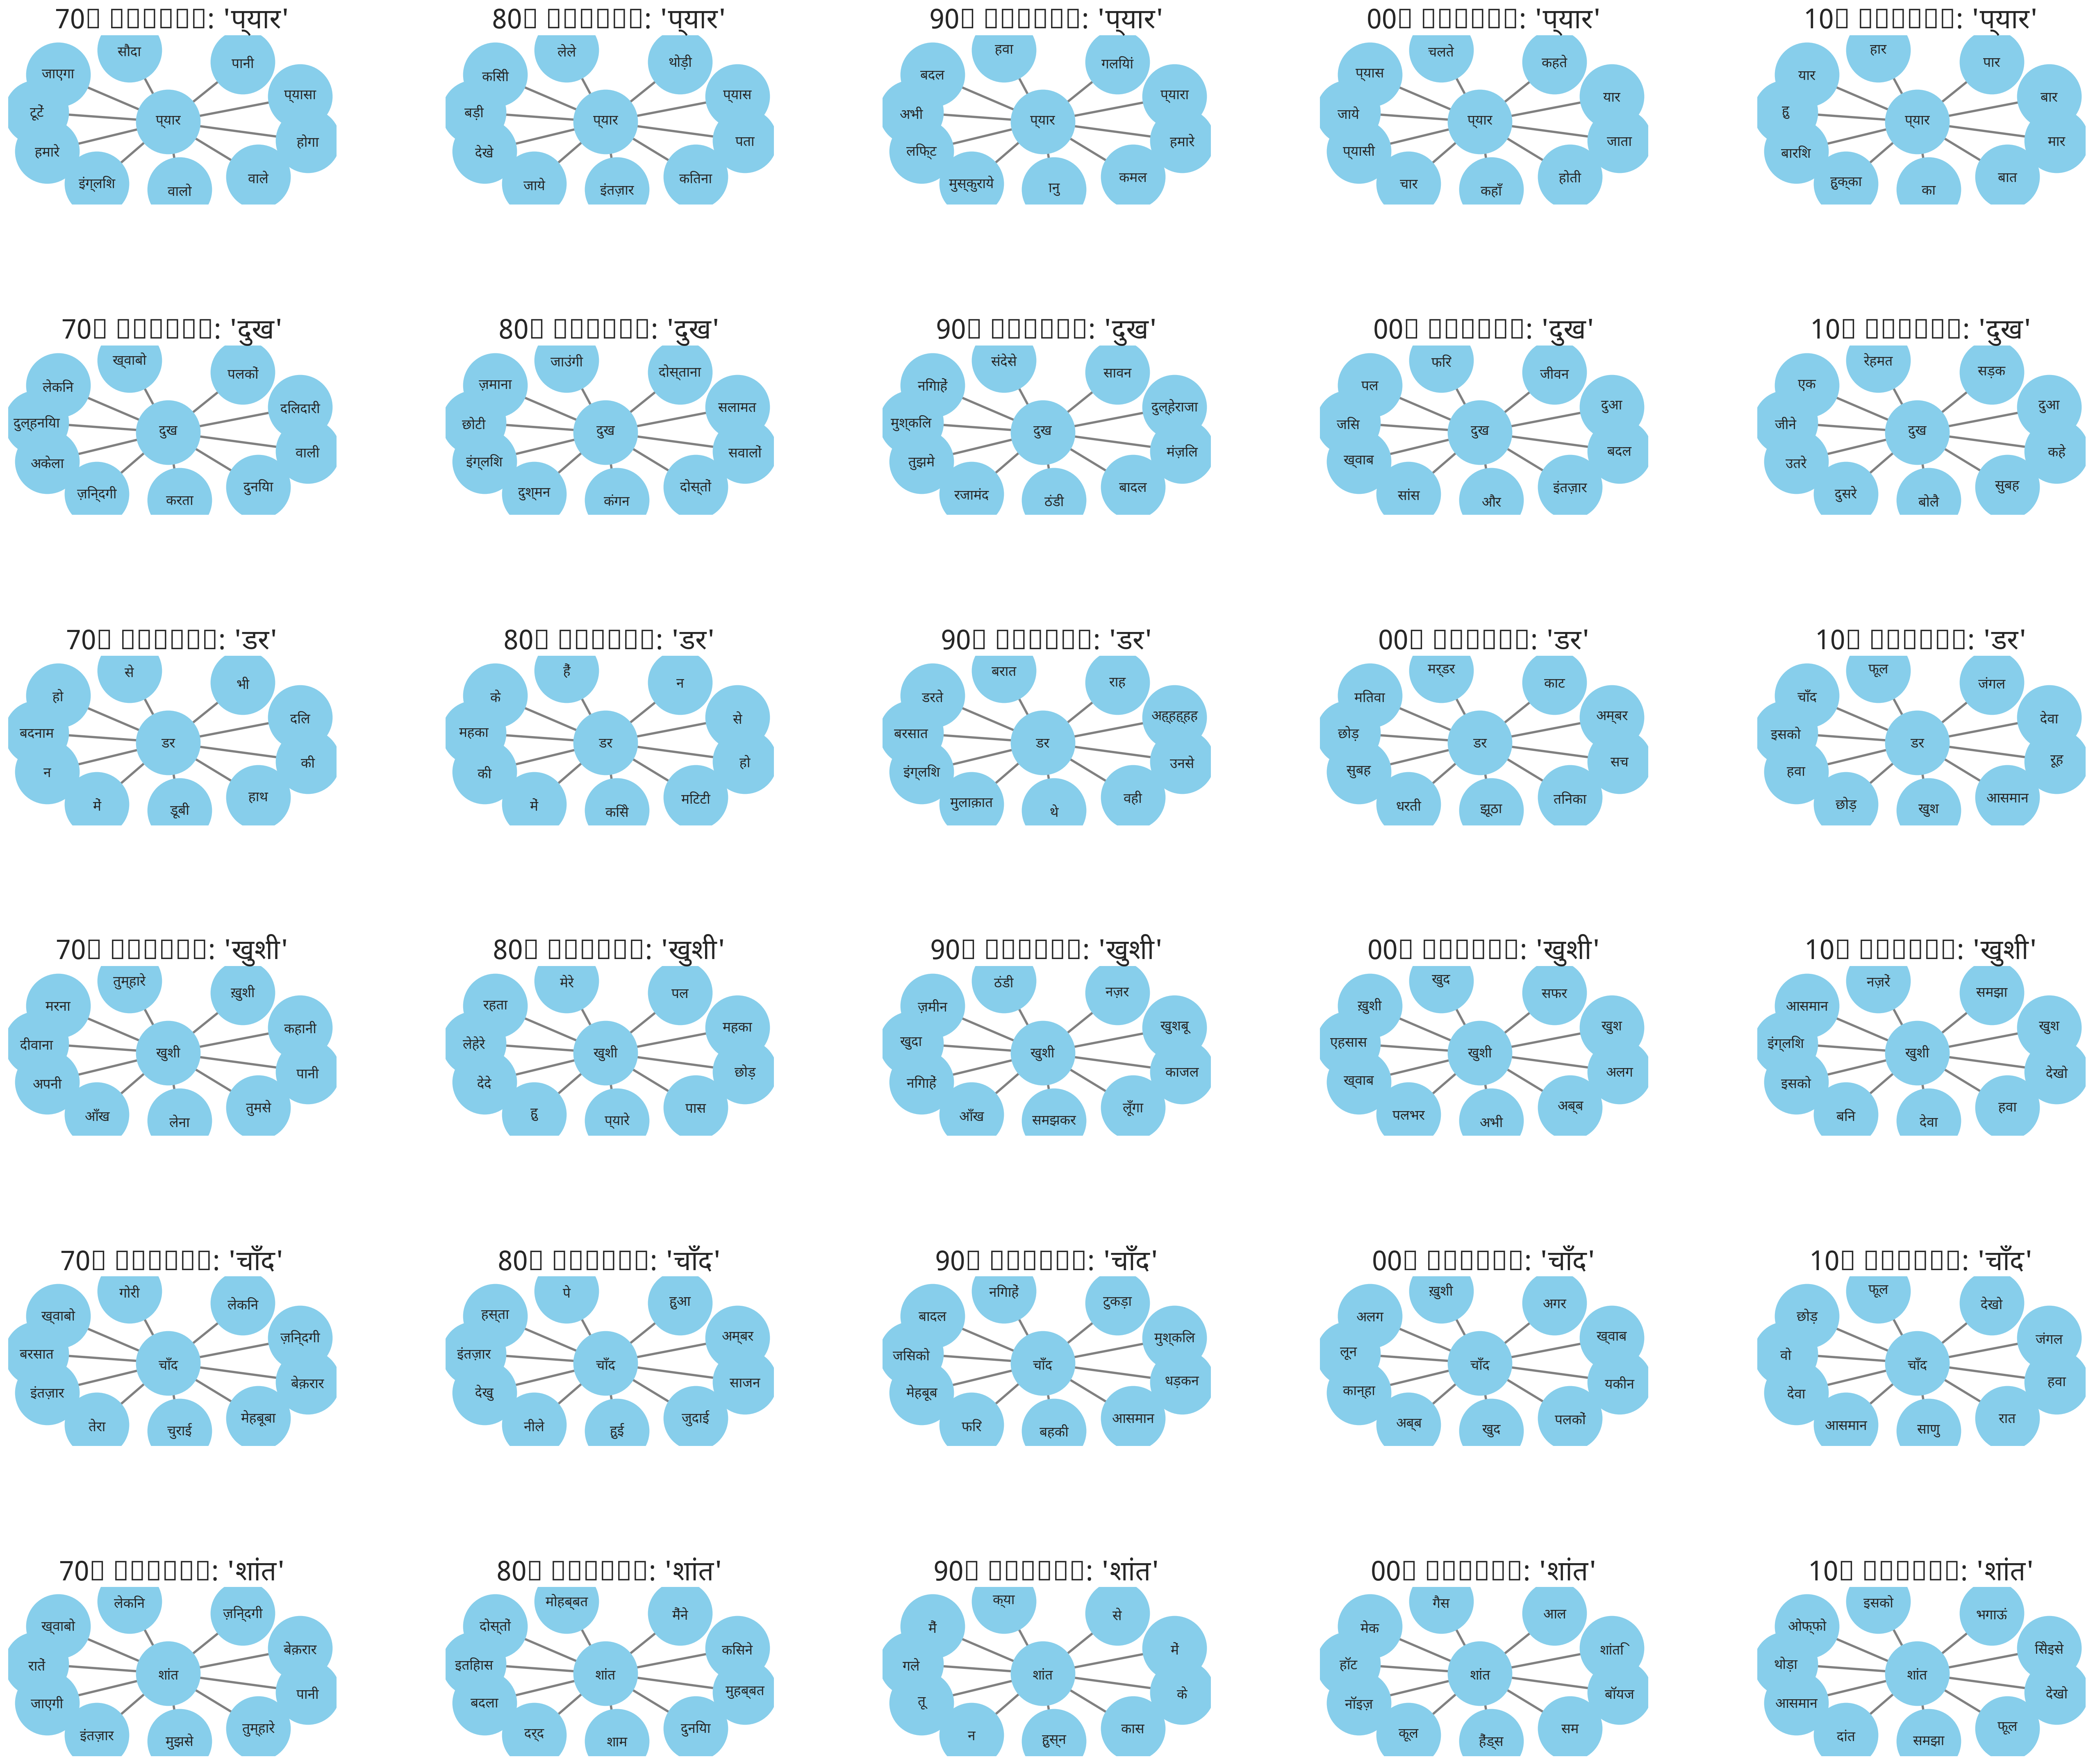

In [ ]:
import fasttext
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf"
try:
    hindi_font = fm.FontProperties(fname=font_path)
    rcParams['font.family'] = hindi_font.get_name()
except FileNotFoundError:
    raise FileNotFoundError("Hindi font not found. Please install 'Noto Sans Devanagari' and update the path.")

words = ["प्यार", "दुख", "डर", "खुशी", "चाँद", "शांत"]
decade_labels = ['70s', '80s', '90s', '00s', '10s']

fig, axes = plt.subplots(len(words), len(decade_labels), figsize=(28, 24))

for i, (df, decade) in enumerate(zip(df_list, decade_labels)):
    lyrics_text = ' '.join(df['lyrics'].dropna().tolist())

    filename = f"decade_{decade}_corpus.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(lyrics_text)

    model = fasttext.train_unsupervised(filename, model='skipgram')

    for j, word in enumerate(words):

        similar_words = model.get_nearest_neighbors(word)
        similar_words_dict = [similar_word for _, similar_word in similar_words]

        G = nx.Graph()
        for similar_word in similar_words_dict:
            G.add_edge(word, similar_word)

        pos = nx.spring_layout(G, k=3.0, iterations=100, seed=42)

        ax = axes[j, i]
        nx.draw(
            G, pos, with_labels=False, node_size=3000, node_color="skyblue", edge_color="gray", ax=ax, width=2
        )
        for node, (x, y) in pos.items():
            ax.text(
                x,
                y,
                s=node,
                fontproperties=hindi_font,
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=12,
            )

        ax.set_title(f"{decade} Decade: '{word}'", fontsize=14, fontproperties=hindi_font)
        ax.axis("off")

plt.tight_layout(pad=4.0)
plt.show()
